<a href="https://colab.research.google.com/github/iffatainiyyah/Skripsi/blob/main/Proyek_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA 

In [ ]:
lalin = pd.read_excel("drive/My Drive/Skripsweet/Lalin.xlsx")
lalin.head()

tgl_perkara          nama alamat  \
0  2021-12-20 00:00:00        HERMAN    NaN   
1  2021-12-20 00:00:00  AHMAD FADHIL    NaN   
2  2021-12-20 00:00:00       WAHYUNI    NaN   
3  2021-12-20 00:00:00        FAHIRA    NaN   
4  2021-12-20 00:00:00         ANJAS    NaN   

                                               pasal barang_bukti  \
0           1 pasal : Pasal 280 jo Pasal 68 ayat (1)      20|STNK   
1  1 pasal : Pasal 287 ayat (1) jo Pasal 106 ayat...     10|SIM C   
2  1 pasal : Pasal 288 ayat (2) jo Pasal 106 ayat...      20|STNK   
3  1 pasal : Pasal 288 ayat (2) jo Pasal 106 ayat...      20|STNK   
4  1 pasal : Pasal 287 ayat (1) jo Pasal 106 ayat...      20|STNK   

          jenis_kendaraan nomor_polisi  
0          1|SEPEDA MOTOR     DD6661QN  
1          1|SEPEDA MOTOR     DD2778RQ  
2          1|SEPEDA MOTOR     DD5857KY  
3          1|SEPEDA MOTOR     DD2393QM  
4  2|MOBIL BARANG/PICK UP     DD8707QZ

In [ ]:
lalin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tgl_perkara      5877 non-null   object
 1   nama             5873 non-null   object
 2   alamat           3792 non-null   object
 3   pasal            5877 non-null   object
 4   barang_bukti     5877 non-null   object
 5   jenis_kendaraan  5877 non-null   object
 6   nomor_polisi     5877 non-null   object
dtypes: object(7)
memory usage: 321.5+ KB


In [ ]:
# Data Cleansing

df_null = round(100*(lalin.isnull().sum())/len(lalin), 2)
df_null

tgl_perkara         0.00
nama                0.07
alamat             35.48
pasal               0.00
barang_bukti        0.00
jenis_kendaraan     0.00
nomor_polisi        0.00
dtype: float64

In [ ]:
df = pd.DataFrame(lalin)
df

tgl_perkara          nama                  alamat  \
0     2021-12-20 00:00:00        HERMAN                     NaN   
1     2021-12-20 00:00:00  AHMAD FADHIL                     NaN   
2     2021-12-20 00:00:00       WAHYUNI                     NaN   
3     2021-12-20 00:00:00        FAHIRA                     NaN   
4     2021-12-20 00:00:00         ANJAS                     NaN   
...                   ...           ...                     ...   
5872  2020-12-17 00:00:00    ARDIANSYAH             JL KARUWISI   
5873  2021-01-03 00:00:00     NUR IKSAN          BAROMBONG GOWA   
5874  2021-01-03 00:00:00          ALDI  JL TIMBUSENG BAROMBONG   
5875  2021-01-03 00:00:00    M RAMADHAN               JENEPONTO   
5876  2021-01-04 00:00:00   M ALFANSURI               BAROMBONG   

                                                  pasal  barang_bukti  \
0              1 pasal : Pasal 280 jo Pasal 68 ayat (1)       20|STNK   
1     1 pasal : Pasal 287 ayat (1) jo Pasal 106 ayat...      10|SIM C   
2     1 pasal : Pasal 288 ayat (2) jo Pasal 106 ayat...       20|STNK   
3     1 pasal : Pasal 288 ayat (2) jo Pasal 106 ayat...       20|STNK   
4     1 pasal : Pasal 287 ayat (1) jo Pasal 106 ayat...       20|STNK   
...                                                 ...           ...   
5872  2 pasal : Pasal 288 ayat (2) jo Pasal 106 ayat...  40|KENDARAAN   
5873  2 pasal : Pasal 288 ayat (2) jo Pasal 106 ayat...  40|KENDARAAN   
5874           1 pasal : Pasal 281 jo Pasal 77 ayat (1)  40|KENDARAAN   
5875  2 pasal : Pasal 288 ayat (2) jo Pasal 106 ayat...  40|KENDARAAN   
5876           1 pasal : Pasal 281 jo Pasal 77 ayat (1)  40|KENDARAAN   

             jenis_kendaraan nomor_polisi  
0             1|SEPEDA MOTOR     DD6661QN  
1             1|SEPEDA MOTOR     DD2778RQ  
2             1|SEPEDA MOTOR     DD5857KY  
3             1|SEPEDA MOTOR     DD2393QM  
4     2|MOBIL BARANG/PICK UP     DD8707QZ  
...                      ...          ...  
5872          1|SEPEDA MOTOR     DD4389CH  
5873          1|SEPEDA MOTOR      DD2971B  
5874          1|SEPEDA MOTOR     DD5660SR  
5875          1|SEPEDA MOTOR     DD6623XX  
5876          1|SEPEDA MOTOR     DD4452YZ  

[5877 rows x 7 columns]

In [ ]:
df.drop('nama', axis=1, inplace=True)
df.drop('alamat', axis=1, inplace=True)
df.drop('nomor_polisi', axis=1, inplace=True)
df.drop('tgl_perkara', axis=1, inplace=True)
df.drop('barang_bukti', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pasal            5877 non-null   object
 1   jenis_kendaraan  5877 non-null   object
dtypes: object(2)
memory usage: 92.0+ KB


In [ ]:
df.head()

pasal         jenis_kendaraan
0           1 pasal : Pasal 280 jo Pasal 68 ayat (1)          1|SEPEDA MOTOR
1  1 pasal : Pasal 287 ayat (1) jo Pasal 106 ayat...          1|SEPEDA MOTOR
2  1 pasal : Pasal 288 ayat (2) jo Pasal 106 ayat...          1|SEPEDA MOTOR
3  1 pasal : Pasal 288 ayat (2) jo Pasal 106 ayat...          1|SEPEDA MOTOR
4  1 pasal : Pasal 287 ayat (1) jo Pasal 106 ayat...  2|MOBIL BARANG/PICK UP

In [ ]:
# Data Preprocessing

# Melakukan split berdasarkan ":""
df['pasal'] = df['pasal'].str.lower()
df['pasal'] = df['pasal'].str.split(':').str[1]
df

pasal  \
0                        pasal 280 jo pasal 68 ayat (1)   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a   
...                                                 ...   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...   
5873   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...   
5874                     pasal 281 jo pasal 77 ayat (1)   
5875   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...   
5876                     pasal 281 jo pasal 77 ayat (1)   

             jenis_kendaraan  
0             1|SEPEDA MOTOR  
1             1|SEPEDA MOTOR  
2             1|SEPEDA MOTOR  
3             1|SEPEDA MOTOR  
4     2|MOBIL BARANG/PICK UP  
...                      ...  
5872          1|SEPEDA MOTOR  
5873          1|SEPEDA MOTOR  
5874          1|SEPEDA MOTOR  
5875          1|SEPEDA MOTOR  
5876          1|SEPEDA MOTOR  

[5877 rows x 2 columns]

In [ ]:
# Melakukan split berdasarkan ","

df['split_pasal'] = df['pasal'].str.split(',')
df.head()

pasal         jenis_kendaraan  \
0                     pasal 280 jo pasal 68 ayat (1)          1|SEPEDA MOTOR   
1   pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          1|SEPEDA MOTOR   
2   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          1|SEPEDA MOTOR   
3   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          1|SEPEDA MOTOR   
4   pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  2|MOBIL BARANG/PICK UP   

                                         split_pasal  
0                  [ pasal 280 jo pasal 68 ayat (1)]  
1  [ pasal 287 ayat (1) jo pasal 106 ayat (4) hur...  
2  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...  
3  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...  
4  [ pasal 287 ayat (1) jo pasal 106 ayat (4) hur...

In [ ]:
# Melakukan visualisasi untuk melihat teks yang tidak konsisten atau tidak bersih

def visualize_pasal(series):
    for list_pasal in series:
        for pasal in list_pasal:
            print(pasal)

visualize_pasal(df['split_pasal'])

Output streaming akan dipotong hingga 5000 baris terakhir.
 pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a
 pasal 291 ayat (2) jo pasal 106 ayat (8)
 pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a
 pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a
 pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b
 pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a
 pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a
 pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a
 pasal 281 jo pasal 77 ayat (1)
 pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a
 pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c
 pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b
 pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a
 pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c
 pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c
 pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a
pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b
 pasal 291 ayat (2) jo pasal 106 ayat (8)
 pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c
 pasal 281 jo pasal 77 aya

In [ ]:
# Melakukan split jo
data = {
    'pasal_hukuman': [],
    'pasal_tuntutan': [],
}

for split in df['split_pasal']:
    pasal_hukuman = []
    pasal_tuntutan = []
    
    for pasal in split:
        if 'jo' in pasal:
            result = pasal.split('jo')
            pasal_hukuman.append(result[0])
            pasal_tuntutan.append(result[1])
        else:
            pasal_hukuman.append(pasal)
    
    data['pasal_hukuman'].append(pasal_hukuman)
    data['pasal_tuntutan'].append(pasal_tuntutan)

df['pasal_hukuman'] = data['pasal_hukuman']
df['pasal_tuntutan'] = data['pasal_tuntutan']
df.head()

pasal         jenis_kendaraan  \
0                     pasal 280 jo pasal 68 ayat (1)          1|SEPEDA MOTOR   
1   pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          1|SEPEDA MOTOR   
2   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          1|SEPEDA MOTOR   
3   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          1|SEPEDA MOTOR   
4   pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  2|MOBIL BARANG/PICK UP   

                                         split_pasal           pasal_hukuman  \
0                  [ pasal 280 jo pasal 68 ayat (1)]           [ pasal 280 ]   
1  [ pasal 287 ayat (1) jo pasal 106 ayat (4) hur...  [ pasal 287 ayat (1) ]   
2  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...  [ pasal 288 ayat (2) ]   
3  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...  [ pasal 288 ayat (2) ]   
4  [ pasal 287 ayat (1) jo pasal 106 ayat (4) hur...  [ pasal 287 ayat (1) ]   

                  pasal_tuntutan  
0           [ pasal 68 ayat (1)]  
1  [ pasal 106 ayat (4) huruf a]  
2  [ pasal 106 ayat (5) huruf b]  
3  [ pasal 106 ayat (5) huruf b]  
4  [ pasal 106 ayat (4) huruf a]

In [ ]:
visualize_pasal(df['pasal_hukuman'])

Output streaming akan dipotong hingga 5000 baris terakhir.
 pasal 287 ayat (1) 
 pasal 291 ayat (2) 
 pasal 287 ayat (1) 
 pasal 287 ayat (1) 
 pasal 288 ayat (2) 
 pasal 287 ayat (1) 
 pasal 287 ayat (1) 
 pasal 287 ayat (1) 
 pasal 281 
 pasal 287 ayat (1) 
 pasal 287 ayat (2) 
 pasal 288 ayat (2) 
 pasal 288 ayat (1) 
 pasal 287 ayat (2) 
 pasal 287 ayat (2) 
 pasal 287 ayat (1) 
pasal 288 ayat (2) 
 pasal 291 ayat (2) 
 pasal 287 ayat (2) 
 pasal 281 
pasal 287 ayat (2) 
 pasal 287 ayat (2) 
 pasal 280 
 pasal 288 ayat (1) 
 pasal 285 ayat (1) 
 pasal 288 ayat (1) 
 pasal 281 
 pasal 287 ayat (2) 
 pasal 289 
 pasal 287 ayat (1) 
 pasal 288 ayat (1) 
 pasal 287 ayat (1) 
 pasal 288 ayat (1) 
 pasal 287 ayat (1) 
 pasal 280 
 pasal 287 ayat (1) 
 pasal 287 ayat (1) 
 pasal 287 ayat (1) 
 pasal 287 ayat (1) 
 pasal 287 ayat (1) 
 pasal 291 ayat (1) 
 pasal 291 ayat (1) 
 pasal 287 ayat (1) 
 pasal 281 
 pasal 281 
 pasal 281 
 pasal 281 
 pasal 281 
 pasal 287 ayat (1) 
 pasal 291 ay

In [ ]:
visualize_pasal(df['pasal_tuntutan'])

Output streaming akan dipotong hingga 5000 baris terakhir.
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (8)
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (5) huruf b
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (4) huruf a
 pasal 77 ayat (1)
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (4) huruf c
 pasal 106 ayat (5) huruf b
 pasal 106 ayat (5) huruf a
 pasal 106 ayat (4) huruf c
 pasal 106 ayat (4) huruf c
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (5) huruf b
 pasal 106 ayat (8)
 pasal 106 ayat (4) huruf c
 pasal 77 ayat (1)
 pasal 106 ayat (4) huruf c
 pasal 106 ayat (4) huruf c
 pasal 68 ayat (1)
 pasal 106 ayat (5) huruf a
 pasal 106 ayat (3)
 pasal 106 ayat (5) huruf a
 pasal 77 ayat (1)
 pasal 106 ayat (4) huruf c
 pasal 106 ayat (6)
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (5) huruf a
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (5) huruf a
 pasal 106 ayat (4) huruf a
 pasal 68 ayat (1)
 pasal 106 ayat (4) huruf a
 pasal 106

In [ ]:
# Melakukan pembersihan data yang mengandung kata-kata lain ex: ;non miras, narkoba, "]", dan, atau
# Split kata "dan" & "atau"

def split_dan_atau(series):
    data = []
    
    for row in series:
        list_pasal = []
        for pasal in row:
            if 'dan' in pasal:
                result = pasal.split('dan')
                list_pasal.append(result[0])
                list_pasal.append(result[1])
            elif 'atau' in pasal:
                result = pasal.split('atau')
                list_pasal.append(result[0])
                list_pasal.append(result[1])
            else:
                list_pasal.append(pasal)
        data.append(list_pasal)
    return data

In [ ]:
pasal_hukuman_series = split_dan_atau(df['pasal_hukuman'])
pasal_tuntutan_series = split_dan_atau(df['pasal_tuntutan'])

df['pasal_hukuman'] = pasal_hukuman_series
df['pasal_tuntutan'] = pasal_tuntutan_series

df

pasal  \
0                        pasal 280 jo pasal 68 ayat (1)   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a   
...                                                 ...   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...   
5873   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...   
5874                     pasal 281 jo pasal 77 ayat (1)   
5875   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...   
5876                     pasal 281 jo pasal 77 ayat (1)   

             jenis_kendaraan  \
0             1|SEPEDA MOTOR   
1             1|SEPEDA MOTOR   
2             1|SEPEDA MOTOR   
3             1|SEPEDA MOTOR   
4     2|MOBIL BARANG/PICK UP   
...                      ...   
5872          1|SEPEDA MOTOR   
5873          1|SEPEDA MOTOR   
5874          1|SEPEDA MOTOR   
5875          1|SEPEDA MOTOR   
5876          1|SEPEDA MOTOR   

                                            split_pasal  \
0                     [ pasal 280 jo pasal 68 ayat (1)]   
1     [ pasal 287 ayat (1) jo pasal 106 ayat (4) hur...   
2     [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
3     [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
4     [ pasal 287 ayat (1) jo pasal 106 ayat (4) hur...   
...                                                 ...   
5872  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
5873  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
5874                  [ pasal 281 jo pasal 77 ayat (1)]   
5875  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
5876                  [ pasal 281 jo pasal 77 ayat (1)]   

                                     pasal_hukuman  \
0                                    [ pasal 280 ]   
1                           [ pasal 287 ayat (1) ]   
2                           [ pasal 288 ayat (2) ]   
3                           [ pasal 288 ayat (2) ]   
4                           [ pasal 287 ayat (1) ]   
...                                            ...   
5872  [ pasal 288 ayat (2) ,  pasal 288 ayat (1) ]   
5873  [ pasal 288 ayat (2) ,  pasal 288 ayat (1) ]   
5874                                 [ pasal 281 ]   
5875  [ pasal 288 ayat (2) ,  pasal 288 ayat (1) ]   
5876                                 [ pasal 281 ]   

                                         pasal_tuntutan  
0                                  [ pasal 68 ayat (1)]  
1                         [ pasal 106 ayat (4) huruf a]  
2                         [ pasal 106 ayat (5) huruf b]  
3                         [ pasal 106 ayat (5) huruf b]  
4                         [ pasal 106 ayat (4) huruf a]  
...                                                 ...  
5872  [ pasal 106 ayat (5) huruf b,  pasal 106 ayat ...  
5873  [ pasal 106 ayat (5) huruf b,  pasal 106 ayat ...  
5874                               [ pasal 77 ayat (1)]  
5875  [ pasal 106 ayat (5) huruf b,  pasal 106 ayat ...  
5876                               [ pasal 77 ayat (1)]  

[5877 rows x 5 columns]

In [ ]:
visualize_pasal(df['pasal_hukuman'])

Output streaming akan dipotong hingga 5000 baris terakhir.
 pasal 287 ayat (1) 
 pasal 291 ayat (2) 
 pasal 287 ayat (1) 
 pasal 287 ayat (1) 
 pasal 288 ayat (2) 
 pasal 287 ayat (1) 
 pasal 287 ayat (1) 
 pasal 287 ayat (1) 
 pasal 281 
 pasal 287 ayat (1) 
 pasal 287 ayat (2) 
 pasal 288 ayat (2) 
 pasal 288 ayat (1) 
 pasal 287 ayat (2) 
 pasal 287 ayat (2) 
 pasal 287 ayat (1) 
pasal 288 ayat (2) 
 pasal 291 ayat (2) 
 pasal 287 ayat (2) 
 pasal 281 
pasal 287 ayat (2) 
 pasal 287 ayat (2) 
 pasal 280 
 pasal 288 ayat (1) 
 pasal 285 ayat (1) 
 pasal 288 ayat (1) 
 pasal 281 
 pasal 287 ayat (2) 
 pasal 289 
 pasal 287 ayat (1) 
 pasal 288 ayat (1) 
 pasal 287 ayat (1) 
 pasal 288 ayat (1) 
 pasal 287 ayat (1) 
 pasal 280 
 pasal 287 ayat (1) 
 pasal 287 ayat (1) 
 pasal 287 ayat (1) 
 pasal 287 ayat (1) 
 pasal 287 ayat (1) 
 pasal 291 ayat (1) 
 pasal 291 ayat (1) 
 pasal 287 ayat (1) 
 pasal 281 
 pasal 281 
 pasal 281 
 pasal 281 
 pasal 281 
 pasal 287 ayat (1) 
 pasal 291 ay

In [ ]:
visualize_pasal(df['pasal_tuntutan'])

Output streaming akan dipotong hingga 5000 baris terakhir.
 pasal 68 ayat (1)
 pasal 77 ayat (1)
 pasal 106 ayat (4) huruf a
 pasal 68 ayat (1)
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (3)
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (3)
 pasal 106 ayat (4) huruf a
 pasal 77 ayat (1)
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (8)
 pasal 68 ayat (1)
 pasal 106 ayat (5) huruf a
 pasal 106 ayat (3)
 pasal 106 ayat (5) huruf a
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (5) huruf b
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (5) huruf c
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (8)
 pasal 68 ayat (1)
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (8)
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (8)
 pasal 68 ayat (1)
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (8)
 pasal 106 ayat (4) huruf a
 pasal 106 ayat (8)
 pasal 106 ayat (5) huruf a
 pasal 106 ayat (8)
 pasal 106 ayat (4) 

In [ ]:
# implementasi regex untuk mengambil data pasal tanpa kata lain dalam kolom
import re

def regex_split(series, pattern):
    data = []
    
    for row in series:
        list_pasal = []
        for pasal in row:
            result = re.findall(pattern, pasal)
            #print(pasal)
            list_pasal.append(result[0].strip())        

        data.append(list_pasal)
  
    return data

In [ ]:
pattern = r"[Pp]asal [0-9]+ ?(?:ay(?:at)?\.?)? ?(?:[\(]?[0-9]*[\)]?)? ?(?:huruf)? ?(?!jo)(?!dan)(?!atau)[a-zA-Z]?"
           
pasal_hukuman_series = regex_split(df['pasal_hukuman'], pattern)
pasal_tuntutan_series = regex_split(df['pasal_tuntutan'], pattern)

df['pasal_hukuman'] = pasal_hukuman_series
df['pasal_tuntutan'] = pasal_tuntutan_series
df

pasal  \
0                        pasal 280 jo pasal 68 ayat (1)   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a   
...                                                 ...   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...   
5873   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...   
5874                     pasal 281 jo pasal 77 ayat (1)   
5875   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...   
5876                     pasal 281 jo pasal 77 ayat (1)   

             jenis_kendaraan  \
0             1|SEPEDA MOTOR   
1             1|SEPEDA MOTOR   
2             1|SEPEDA MOTOR   
3             1|SEPEDA MOTOR   
4     2|MOBIL BARANG/PICK UP   
...                      ...   
5872          1|SEPEDA MOTOR   
5873          1|SEPEDA MOTOR   
5874          1|SEPEDA MOTOR   
5875          1|SEPEDA MOTOR   
5876          1|SEPEDA MOTOR   

                                            split_pasal  \
0                     [ pasal 280 jo pasal 68 ayat (1)]   
1     [ pasal 287 ayat (1) jo pasal 106 ayat (4) hur...   
2     [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
3     [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
4     [ pasal 287 ayat (1) jo pasal 106 ayat (4) hur...   
...                                                 ...   
5872  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
5873  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
5874                  [ pasal 281 jo pasal 77 ayat (1)]   
5875  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
5876                  [ pasal 281 jo pasal 77 ayat (1)]   

                                 pasal_hukuman  \
0                                  [pasal 280]   
1                         [pasal 287 ayat (1)]   
2                         [pasal 288 ayat (2)]   
3                         [pasal 288 ayat (2)]   
4                         [pasal 287 ayat (1)]   
...                                        ...   
5872  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5873  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5874                               [pasal 281]   
5875  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5876                               [pasal 281]   

                                         pasal_tuntutan  
0                                   [pasal 68 ayat (1)]  
1                          [pasal 106 ayat (4) huruf a]  
2                          [pasal 106 ayat (5) huruf b]  
3                          [pasal 106 ayat (5) huruf b]  
4                          [pasal 106 ayat (4) huruf a]  
...                                                 ...  
5872  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...  
5873  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...  
5874                                [pasal 77 ayat (1)]  
5875  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...  
5876                                [pasal 77 ayat (1)]  

[5877 rows x 5 columns]

In [ ]:
df['jenis_kendaraan'].value_counts()

1|SEPEDA MOTOR            4052
3|MINI BUS                 849
4|MKL/MOBIL PENUMPANG      613
6|TRUCK BESAR              180
2|MOBIL BARANG/PICK UP     129
99|LAIN-LAIN                24
11|SEDAN                    12
10|JEEP                     11
16|TRUCK KECIL               3
90|BUKTI ELEKTRONIK          3
17|TRUCK TANGKI              1
Name: jenis_kendaraan, dtype: int64

In [ ]:
df = df[df['jenis_kendaraan']!='90|BUKTI ELEKTRONIK']
df['jenis_kendaraan'].value_counts()

1|SEPEDA MOTOR            4052
3|MINI BUS                 849
4|MKL/MOBIL PENUMPANG      613
6|TRUCK BESAR              180
2|MOBIL BARANG/PICK UP     129
99|LAIN-LAIN                24
11|SEDAN                    12
10|JEEP                     11
16|TRUCK KECIL               3
17|TRUCK TANGKI              1
Name: jenis_kendaraan, dtype: int64

In [ ]:
df = df.reset_index()
df.drop('index', axis=1, inplace=True)

In [ ]:
df.head()

pasal         jenis_kendaraan  \
0                     pasal 280 jo pasal 68 ayat (1)          1|SEPEDA MOTOR   
1   pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          1|SEPEDA MOTOR   
2   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          1|SEPEDA MOTOR   
3   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          1|SEPEDA MOTOR   
4   pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  2|MOBIL BARANG/PICK UP   

                                         split_pasal         pasal_hukuman  \
0                  [ pasal 280 jo pasal 68 ayat (1)]           [pasal 280]   
1  [ pasal 287 ayat (1) jo pasal 106 ayat (4) hur...  [pasal 287 ayat (1)]   
2  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...  [pasal 288 ayat (2)]   
3  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...  [pasal 288 ayat (2)]   
4  [ pasal 287 ayat (1) jo pasal 106 ayat (4) hur...  [pasal 287 ayat (1)]   

                 pasal_tuntutan  
0           [pasal 68 ayat (1)]  
1  [pasal 106 ayat (4) huruf a]  
2  [pasal 106 ayat (5) huruf b]  
3  [pasal 106 ayat (5) huruf b]  
4  [pasal 106 ayat (4) huruf a]

In [ ]:
# melakukan split pada data barang bukti, jenis kendaraan, dan jumlah pasal
df['jenis_kendaraan'] = df['jenis_kendaraan'].str.split('|').str[1]
df

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

                                            split_pasal  \
0                     [ pasal 280 jo pasal 68 ayat (1)]   
1     [ pasal 287 ayat (1) jo pasal 106 ayat (4) hur...   
2     [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
3     [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
4     [ pasal 287 ayat (1) jo pasal 106 ayat (4) hur...   
...                                                 ...   
5869  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
5870  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
5871                  [ pasal 281 jo pasal 77 ayat (1)]   
5872  [ pasal 288 ayat (2) jo pasal 106 ayat (5) hur...   
5873                  [ pasal 281 jo pasal 77 ayat (1)]   

                                 pasal_hukuman  \
0                                  [pasal 280]   
1                         [pasal 287 ayat (1)]   
2                         [pasal 288 ayat (2)]   
3                         [pasal 288 ayat (2)]   
4                         [pasal 287 ayat (1)]   
...                                        ...   
5869  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5870  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5871                               [pasal 281]   
5872  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5873                               [pasal 281]   

                                         pasal_tuntutan  
0                                   [pasal 68 ayat (1)]  
1                          [pasal 106 ayat (4) huruf a]  
2                          [pasal 106 ayat (5) huruf b]  
3                          [pasal 106 ayat (5) huruf b]  
4                          [pasal 106 ayat (4) huruf a]  
...                                                 ...  
5869  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...  
5870  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...  
5871                                [pasal 77 ayat (1)]  
5872  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...  
5873                                [pasal 77 ayat (1)]  

[5874 rows x 5 columns]

In [ ]:
df.drop('split_pasal', axis=1, inplace=True)
dfs = df.copy()
dfa = df.copy()
df_numeric = df.copy()

In [ ]:
# Melakukan split , pada pasal hukuman
dataa = {
    'pasal_hukuman_1': [],
    'pasal_hukuman_2': [],
}

for split in df['pasal_hukuman']:
    pasal_hukuman_1 = []
    pasal_hukuman_2 = []
    
    pasal_hukuman_1.append(split[0])
    try:
      pasal_hukuman_2.append(split[1])
    except IndexError:
      pasal_hukuman_2.append(0)
    dataa['pasal_hukuman_1'].append(pasal_hukuman_1)
    dataa['pasal_hukuman_2'].append(pasal_hukuman_2)

dfs['pasal_hukuman_1'] = dataa['pasal_hukuman_1']
dfs['pasal_hukuman_2'] = dataa['pasal_hukuman_2']
dfa['pasal_hukuman_1'] = dataa['pasal_hukuman_1']
dfa['pasal_hukuman_2'] = dataa['pasal_hukuman_2']

In [ ]:
# Melakukan split , pada pasal tuntutan
dataa = {
    'pasal_tuntutan_1': [],
    'pasal_tuntutan_2': [],
}

for split in df['pasal_tuntutan']:
    pasal_tuntutan_1 = []
    pasal_tuntutan_2 = []
    
    pasal_tuntutan_1.append(split[0])
    try:
      pasal_tuntutan_2.append(split[1])
    except IndexError:
      pasal_tuntutan_2.append(0)
    dataa['pasal_tuntutan_1'].append(pasal_tuntutan_1)
    dataa['pasal_tuntutan_2'].append(pasal_tuntutan_2)

dfs['pasal_tuntutan_1'] = dataa['pasal_tuntutan_1']
dfs['pasal_tuntutan_2'] = dataa['pasal_tuntutan_2']
dfa['pasal_tuntutan_1'] = dataa['pasal_tuntutan_1']
dfa['pasal_tuntutan_2'] = dataa['pasal_tuntutan_2']

In [ ]:
dfs.drop('pasal_hukuman', axis=1, inplace=True)
dfs.drop('pasal_tuntutan', axis=1, inplace=True)
dfa.drop('pasal_hukuman', axis=1, inplace=True)
dfa.drop('pasal_tuntutan', axis=1, inplace=True)
dfs

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

           pasal_hukuman_1       pasal_hukuman_2  \
0              [pasal 280]                   [0]   
1     [pasal 287 ayat (1)]                   [0]   
2     [pasal 288 ayat (2)]                   [0]   
3     [pasal 288 ayat (2)]                   [0]   
4     [pasal 287 ayat (1)]                   [0]   
...                    ...                   ...   
5869  [pasal 288 ayat (2)]  [pasal 288 ayat (1)]   
5870  [pasal 288 ayat (2)]  [pasal 288 ayat (1)]   
5871           [pasal 281]                   [0]   
5872  [pasal 288 ayat (2)]  [pasal 288 ayat (1)]   
5873           [pasal 281]                   [0]   

                  pasal_tuntutan_1              pasal_tuntutan_2  
0              [pasal 68 ayat (1)]                           [0]  
1     [pasal 106 ayat (4) huruf a]                           [0]  
2     [pasal 106 ayat (5) huruf b]                           [0]  
3     [pasal 106 ayat (5) huruf b]                           [0]  
4     [pasal 106 ayat (4) huruf a]                           [0]  
...                            ...                           ...  
5869  [pasal 106 ayat (5) huruf b]  [pasal 106 ayat (5) huruf a]  
5870  [pasal 106 ayat (5) huruf b]  [pasal 106 ayat (5) huruf a]  
5871           [pasal 77 ayat (1)]                           [0]  
5872  [pasal 106 ayat (5) huruf b]  [pasal 106 ayat (5) huruf a]  
5873           [pasal 77 ayat (1)]                           [0]  

[5874 rows x 6 columns]

In [ ]:
dfa

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

           pasal_hukuman_1       pasal_hukuman_2  \
0              [pasal 280]                   [0]   
1     [pasal 287 ayat (1)]                   [0]   
2     [pasal 288 ayat (2)]                   [0]   
3     [pasal 288 ayat (2)]                   [0]   
4     [pasal 287 ayat (1)]                   [0]   
...                    ...                   ...   
5869  [pasal 288 ayat (2)]  [pasal 288 ayat (1)]   
5870  [pasal 288 ayat (2)]  [pasal 288 ayat (1)]   
5871           [pasal 281]                   [0]   
5872  [pasal 288 ayat (2)]  [pasal 288 ayat (1)]   
5873           [pasal 281]                   [0]   

                  pasal_tuntutan_1              pasal_tuntutan_2  
0              [pasal 68 ayat (1)]                           [0]  
1     [pasal 106 ayat (4) huruf a]                           [0]  
2     [pasal 106 ayat (5) huruf b]                           [0]  
3     [pasal 106 ayat (5) huruf b]                           [0]  
4     [pasal 106 ayat (4) huruf a]                           [0]  
...                            ...                           ...  
5869  [pasal 106 ayat (5) huruf b]  [pasal 106 ayat (5) huruf a]  
5870  [pasal 106 ayat (5) huruf b]  [pasal 106 ayat (5) huruf a]  
5871           [pasal 77 ayat (1)]                           [0]  
5872  [pasal 106 ayat (5) huruf b]  [pasal 106 ayat (5) huruf a]  
5873           [pasal 77 ayat (1)]                           [0]  

[5874 rows x 6 columns]

In [ ]:
dfs['pasal_tuntutan_1'] = [''.join(map(str, l)) for l in dfs['pasal_tuntutan_1']]
dfs['pasal_tuntutan_2'] = [''.join(map(str, l)) for l in dfs['pasal_tuntutan_2']]

dfs['pasal_hukuman_1'] = [''.join(map(str, l)) for l in dfs['pasal_hukuman_1']]
dfs['pasal_hukuman_2'] = [''.join(map(str, l)) for l in dfs['pasal_hukuman_2']]

dfa['pasal_tuntutan_1'] = [''.join(map(str, l)) for l in dfa['pasal_tuntutan_1']]
dfa['pasal_tuntutan_2'] = [''.join(map(str, l)) for l in dfa['pasal_tuntutan_2']]

dfa['pasal_hukuman_1'] = [''.join(map(str, l)) for l in dfa['pasal_hukuman_1']]
dfa['pasal_hukuman_2'] = [''.join(map(str, l)) for l in dfa['pasal_hukuman_2']]
dfs

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

         pasal_hukuman_1     pasal_hukuman_2            pasal_tuntutan_1  \
0              pasal 280                   0           pasal 68 ayat (1)   
1     pasal 287 ayat (1)                   0  pasal 106 ayat (4) huruf a   
2     pasal 288 ayat (2)                   0  pasal 106 ayat (5) huruf b   
3     pasal 288 ayat (2)                   0  pasal 106 ayat (5) huruf b   
4     pasal 287 ayat (1)                   0  pasal 106 ayat (4) huruf a   
...                  ...                 ...                         ...   
5869  pasal 288 ayat (2)  pasal 288 ayat (1)  pasal 106 ayat (5) huruf b   
5870  pasal 288 ayat (2)  pasal 288 ayat (1)  pasal 106 ayat (5) huruf b   
5871           pasal 281                   0           pasal 77 ayat (1)   
5872  pasal 288 ayat (2)  pasal 288 ayat (1)  pasal 106 ayat (5) huruf b   
5873           pasal 281                   0           pasal 77 ayat (1)   

                pasal_tuntutan_2  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  
...                          ...  
5869  pasal 106 ayat (5) huruf a  
5870  pasal 106 ayat (5) huruf a  
5871                           0  
5872  pasal 106 ayat (5) huruf a  
5873                           0  

[5874 rows x 6 columns]

In [ ]:
dfa

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

         pasal_hukuman_1     pasal_hukuman_2            pasal_tuntutan_1  \
0              pasal 280                   0           pasal 68 ayat (1)   
1     pasal 287 ayat (1)                   0  pasal 106 ayat (4) huruf a   
2     pasal 288 ayat (2)                   0  pasal 106 ayat (5) huruf b   
3     pasal 288 ayat (2)                   0  pasal 106 ayat (5) huruf b   
4     pasal 287 ayat (1)                   0  pasal 106 ayat (4) huruf a   
...                  ...                 ...                         ...   
5869  pasal 288 ayat (2)  pasal 288 ayat (1)  pasal 106 ayat (5) huruf b   
5870  pasal 288 ayat (2)  pasal 288 ayat (1)  pasal 106 ayat (5) huruf b   
5871           pasal 281                   0           pasal 77 ayat (1)   
5872  pasal 288 ayat (2)  pasal 288 ayat (1)  pasal 106 ayat (5) huruf b   
5873           pasal 281                   0           pasal 77 ayat (1)   

                pasal_tuntutan_2  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  
...                          ...  
5869  pasal 106 ayat (5) huruf a  
5870  pasal 106 ayat (5) huruf a  
5871                           0  
5872  pasal 106 ayat (5) huruf a  
5873                           0  

[5874 rows x 6 columns]

In [ ]:
rename_pasal1 = pd.read_excel("drive/My Drive/Skripsweet/Pasal2.xlsx")
rename_pasal1.head()

pasal       arti
0           pasal 68 ayat (1)    ps68(1)
1  pasal 106 ayat (4) huruf a  ps106(4)a
2  pasal 106 ayat (5) huruf b  ps106(5)b
3          pasal 106 ayat (3)   ps106(3)
4  pasal 106 ayat (4) huruf b  ps106(4)b

In [ ]:
rename_pasal2 = pd.read_excel("drive/My Drive/Skripsweet/Pasal.xlsx")
rename_pasal2.head()

pasal             arti
0           pasal 68 ayat (1)       Plat palsu
1  pasal 106 ayat (4) huruf a      Rambu-rambu
2  pasal 106 ayat (5) huruf b  Menunjukkan SIM
3          pasal 106 ayat (3)      teknik laik
4  pasal 106 ayat (4) huruf b            Marka

In [ ]:
rn_dict1 = dict(rename_pasal1.values)
rn_dict2 = dict(rename_pasal2.values)

In [ ]:
dfs['pasal_hukuman_1'] = dfs['pasal_hukuman_1'].map(rn_dict1)
dfs['pasal_hukuman_2'] = dfs['pasal_hukuman_2'].map(rn_dict1)
dfs['pasal_tuntutan_1'] = dfs['pasal_tuntutan_1'].map(rn_dict1)
dfs['pasal_tuntutan_2'] = dfs['pasal_tuntutan_2'].map(rn_dict1)
dfs

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

     pasal_hukuman_1 pasal_hukuman_2 pasal_tuntutan_1 pasal_tuntutan_2  
0              ps280             NaN          ps68(1)              NaN  
1           ps287(1)             NaN        ps106(4)a              NaN  
2           ps288(2)             NaN        ps106(5)b              NaN  
3           ps288(2)             NaN        ps106(5)b              NaN  
4           ps287(1)             NaN        ps106(4)a              NaN  
...              ...             ...              ...              ...  
5869        ps288(2)        ps288(1)        ps106(5)b        ps106(5)a  
5870        ps288(2)        ps288(1)        ps106(5)b        ps106(5)a  
5871           ps281             NaN          ps77(1)              NaN  
5872        ps288(2)        ps288(1)        ps106(5)b        ps106(5)a  
5873           ps281             NaN          ps77(1)              NaN  

[5874 rows x 6 columns]

In [ ]:
dfa['pasal_hukuman_1'] = dfa['pasal_hukuman_1'].map(rn_dict2)
dfa['pasal_hukuman_2'] = dfa['pasal_hukuman_2'].map(rn_dict2)
dfa['pasal_tuntutan_1'] = dfa['pasal_tuntutan_1'].map(rn_dict2)
dfa['pasal_tuntutan_2'] = dfa['pasal_tuntutan_2'].map(rn_dict2)
dfa

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

               pasal_hukuman_1 pasal_hukuman_2 pasal_tuntutan_1  \
0         Tidak dipasangi TNKB             NaN       Plat palsu   
1        Melanggar rambu lalin             NaN      Rambu-rambu   
2     Tidak memperlihatkan SIM             NaN  Menunjukkan SIM   
3     Tidak memperlihatkan SIM             NaN  Menunjukkan SIM   
4        Melanggar rambu lalin             NaN      Rambu-rambu   
...                        ...             ...              ...   
5869  Tidak memperlihatkan SIM  Tidak ada STNK  Menunjukkan SIM   
5870  Tidak memperlihatkan SIM  Tidak ada STNK  Menunjukkan SIM   
5871                    No SIM             NaN  Kepemilikan SIM   
5872  Tidak memperlihatkan SIM  Tidak ada STNK  Menunjukkan SIM   
5873                    No SIM             NaN  Kepemilikan SIM   

     pasal_tuntutan_2  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
5869             STNK  
5870             STNK  
5871              NaN  
5872             STNK  
5873              NaN  

[5874 rows x 6 columns]

In [ ]:
dfs['pasal_hukuman'] = np.where(dfs['pasal_hukuman_2'].isnull(), dfs['pasal_hukuman_1'], 
                                dfs['pasal_hukuman_1']+', '+ dfs['pasal_hukuman_2'])

dfs['pasal_tuntutan'] = np.where(dfs['pasal_tuntutan_2'].isnull(), dfs['pasal_tuntutan_1'], 
                                dfs['pasal_tuntutan_1']+', '+ dfs['pasal_tuntutan_2'])

In [ ]:
dfs.drop('pasal_hukuman_1', axis=1, inplace=True)
dfs.drop('pasal_hukuman_2', axis=1, inplace=True)
dfs.drop('pasal_tuntutan_1', axis=1, inplace=True)
dfs.drop('pasal_tuntutan_2', axis=1, inplace=True)
dfs

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

           pasal_hukuman        pasal_tuntutan  
0                  ps280               ps68(1)  
1               ps287(1)             ps106(4)a  
2               ps288(2)             ps106(5)b  
3               ps288(2)             ps106(5)b  
4               ps287(1)             ps106(4)a  
...                  ...                   ...  
5869  ps288(2), ps288(1)  ps106(5)b, ps106(5)a  
5870  ps288(2), ps288(1)  ps106(5)b, ps106(5)a  
5871               ps281               ps77(1)  
5872  ps288(2), ps288(1)  ps106(5)b, ps106(5)a  
5873               ps281               ps77(1)  

[5874 rows x 4 columns]

In [ ]:
dfs['merge_var'] = dfs['pasal_hukuman'].str.cat(dfs['jenis_kendaraan'],sep=", ")
dfs

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

           pasal_hukuman        pasal_tuntutan  \
0                  ps280               ps68(1)   
1               ps287(1)             ps106(4)a   
2               ps288(2)             ps106(5)b   
3               ps288(2)             ps106(5)b   
4               ps287(1)             ps106(4)a   
...                  ...                   ...   
5869  ps288(2), ps288(1)  ps106(5)b, ps106(5)a   
5870  ps288(2), ps288(1)  ps106(5)b, ps106(5)a   
5871               ps281               ps77(1)   
5872  ps288(2), ps288(1)  ps106(5)b, ps106(5)a   
5873               ps281               ps77(1)   

                             merge_var  
0                  ps280, SEPEDA MOTOR  
1               ps287(1), SEPEDA MOTOR  
2               ps288(2), SEPEDA MOTOR  
3               ps288(2), SEPEDA MOTOR  
4       ps287(1), MOBIL BARANG/PICK UP  
...                                ...  
5869  ps288(2), ps288(1), SEPEDA MOTOR  
5870  ps288(2), ps288(1), SEPEDA MOTOR  
5871               ps281, SEPEDA MOTOR  
5872  ps288(2), ps288(1), SEPEDA MOTOR  
5873               ps281, SEPEDA MOTOR  

[5874 rows x 5 columns]

In [ ]:
dfa['pasal_hukuman'] = np.where(dfa['pasal_hukuman_2'].isnull(), dfa['pasal_hukuman_1'], 
                                dfa['pasal_hukuman_1']+', '+ dfa['pasal_hukuman_2'])

dfa['pasal_tuntutan'] = np.where(dfa['pasal_tuntutan_2'].isnull(), dfa['pasal_tuntutan_1'], 
                                dfa['pasal_tuntutan_1']+', '+ dfa['pasal_tuntutan_2'])

In [ ]:
dfa.drop('pasal_hukuman_1', axis=1, inplace=True)
dfa.drop('pasal_hukuman_2', axis=1, inplace=True)
dfa.drop('pasal_tuntutan_1', axis=1, inplace=True)
dfa.drop('pasal_tuntutan_2', axis=1, inplace=True)
dfa

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

                                 pasal_hukuman         pasal_tuntutan  
0                         Tidak dipasangi TNKB             Plat palsu  
1                        Melanggar rambu lalin            Rambu-rambu  
2                     Tidak memperlihatkan SIM        Menunjukkan SIM  
3                     Tidak memperlihatkan SIM        Menunjukkan SIM  
4                        Melanggar rambu lalin            Rambu-rambu  
...                                        ...                    ...  
5869  Tidak memperlihatkan SIM, Tidak ada STNK  Menunjukkan SIM, STNK  
5870  Tidak memperlihatkan SIM, Tidak ada STNK  Menunjukkan SIM, STNK  
5871                                    No SIM        Kepemilikan SIM  
5872  Tidak memperlihatkan SIM, Tidak ada STNK  Menunjukkan SIM, STNK  
5873                                    No SIM        Kepemilikan SIM  

[5874 rows x 4 columns]

In [ ]:
dfa['merge_var'] = dfa['pasal_hukuman'].str.cat(dfa['jenis_kendaraan'],sep=", ")
dfa

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

                                 pasal_hukuman         pasal_tuntutan  \
0                         Tidak dipasangi TNKB             Plat palsu   
1                        Melanggar rambu lalin            Rambu-rambu   
2                     Tidak memperlihatkan SIM        Menunjukkan SIM   
3                     Tidak memperlihatkan SIM        Menunjukkan SIM   
4                        Melanggar rambu lalin            Rambu-rambu   
...                                        ...                    ...   
5869  Tidak memperlihatkan SIM, Tidak ada STNK  Menunjukkan SIM, STNK   
5870  Tidak memperlihatkan SIM, Tidak ada STNK  Menunjukkan SIM, STNK   
5871                                    No SIM        Kepemilikan SIM   
5872  Tidak memperlihatkan SIM, Tidak ada STNK  Menunjukkan SIM, STNK   
5873                                    No SIM        Kepemilikan SIM   

                                              merge_var  
0                    Tidak dipasangi TNKB, SEPEDA MOTOR  
1                   Melanggar rambu lalin, SEPEDA MOTOR  
2                Tidak memperlihatkan SIM, SEPEDA MOTOR  
3                Tidak memperlihatkan SIM, SEPEDA MOTOR  
4           Melanggar rambu lalin, MOBIL BARANG/PICK UP  
...                                                 ...  
5869  Tidak memperlihatkan SIM, Tidak ada STNK, SEPE...  
5870  Tidak memperlihatkan SIM, Tidak ada STNK, SEPE...  
5871                               No SIM, SEPEDA MOTOR  
5872  Tidak memperlihatkan SIM, Tidak ada STNK, SEPE...  
5873                               No SIM, SEPEDA MOTOR  

[5874 rows x 5 columns]

In [ ]:
# melakukan one hot encoding pada data pasal

def one_hot(df, nama_pasal):
    data = {}
    for list_of_hukuman in df[nama_pasal]:
        for pasal in list_of_hukuman:
            if pasal not in data.keys():
                data[pasal] = []
                
                for list_hukuman in df[nama_pasal]:
                    if pasal in list_hukuman:
                        data[pasal].append(1)
                    else:
                        data[pasal].append(0)

    for key, value in data.items():
        df[key] = value
    return df

df_numeric = one_hot(df_numeric, 'pasal_hukuman')
df_numeric = one_hot(df_numeric, 'pasal_tuntutan')
df_numeric

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

                                 pasal_hukuman  \
0                                  [pasal 280]   
1                         [pasal 287 ayat (1)]   
2                         [pasal 288 ayat (2)]   
3                         [pasal 288 ayat (2)]   
4                         [pasal 287 ayat (1)]   
...                                        ...   
5869  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5870  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5871                               [pasal 281]   
5872  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5873                               [pasal 281]   

                                         pasal_tuntutan  pasal 280  \
0                                   [pasal 68 ayat (1)]          1   
1                          [pasal 106 ayat (4) huruf a]          0   
2                          [pasal 106 ayat (5) huruf b]          0   
3                          [pasal 106 ayat (5) huruf b]          0   
4                          [pasal 106 ayat (4) huruf a]          0   
...                                                 ...        ...   
5869  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...          0   
5870  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...          0   
5871                                [pasal 77 ayat (1)]          0   
5872  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...          0   
5873                                [pasal 77 ayat (1)]          0   

      pasal 287 ayat (1)  pasal 288 ayat (2)  pasal 285 ayat (1)  \
0                      0                   0                   0   
1                      1                   0                   0   
2                      0                   1                   0   
3                      0                   1                   0   
4                      1                   0                   0   
...                  ...                 ...                 ...   
5869                   0                   1                   0   
5870                   0                   1                   0   
5871                   0                   0                   0   
5872                   0                   1                   0   
5873                   0                   0                   0   

      pasal 291 ayat (1)  pasal 288 ayat (1)  ...  pasal 70 ayat (2)  \
0                      0                   0  ...                  0   
1                      0                   0  ...                  0   
2                      0                   0  ...                  0   
3                      0                   0  ...                  0   
4                      0                   0  ...                  0   
...                  ...                 ...  ...                ...   
5869                   0                   1  ...                  0   
5870                   0                   1  ...                  0   
5871                   0                   0  ...                  0   
5872                   0                   1  ...                  0   
5873                   0  

In [ ]:
df_numeric.drop('pasal',axis=1,inplace=True)
df_numeric.drop('pasal_tuntutan',axis=1,inplace=True)
df_numeric.drop('pasal_hukuman',axis=1,inplace=True)
df_numeric

jenis_kendaraan  pasal 280  pasal 287 ayat (1)  pasal 288 ayat (2)  \
0             SEPEDA MOTOR          1                   0                   0   
1             SEPEDA MOTOR          0                   1                   0   
2             SEPEDA MOTOR          0                   0                   1   
3             SEPEDA MOTOR          0                   0                   1   
4     MOBIL BARANG/PICK UP          0                   1                   0   
...                    ...        ...                 ...                 ...   
5869          SEPEDA MOTOR          0                   0                   1   
5870          SEPEDA MOTOR          0                   0                   1   
5871          SEPEDA MOTOR          0                   0                   0   
5872          SEPEDA MOTOR          0                   0                   1   
5873          SEPEDA MOTOR          0                   0                   0   

      pasal 285 ayat (1)  pasal 291 ayat (1)  pasal 288 ayat (1)  \
0                      0                   0                   0   
1                      0                   0                   0   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   
...                  ...                 ...                 ...   
5869                   0                   0                   1   
5870                   0                   0                   1   
5871                   0                   0                   0   
5872                   0                   0                   1   
5873                   0                   0                   0   

      pasal 291 ayat (2)  pasal 287 ayat (2)  pasal 288 ayat (3)  ...  \
0                      0                   0                   0  ...   
1                      0                   0                   0  ...   
2                      0                   0                   0  ...   
3                      0                   0                   0  ...   
4                      0                   0                   0  ...   
...                  ...                 ...                 ...  ...   
5869                   0                   0                   0  ...   
5870                   0                   0                   0  ...   
5871                   0                   0                   0  ...   
5872                   0                   0                   0  ...   
5873                   0                   0                   0  ...   

      pasal 70 ayat (2)  pasal 115 huruf b  pasal 104 ayat (3)  pasal 125  \
0                     0                  0                   0          0   
1                     0                  0                   0          0   
2                     0                  0                   0          0   
3                     0                  0                   0          0   
4                     0                  0                   0          0   
...                 ...                ...                 ...        ...   
5869                  0                  0                   0          0   
5870                  0                  0                   0          0   
5871                  0                  0                   0          0   
5872                  0                  0                   0          0   
5873                  0                  0                   0          0   

      pasal 137 ayat (4)  pasal 106 ayat (4) huruf g  pasal 115 huruf a  \
0                      0                           0                  0   
1                      0                           0                  0   
2                      0                           0                  0   
3                      0                           0                  0   
4                      0                    

In [ ]:
# Melakukan pelabelan pada fitur jenis kendaraan sbg data kategorikal
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_numeric['jenis_kendaraan'] = encoder.fit_transform(df_numeric['jenis_kendaraan'])
df_numeric

jenis_kendaraan  pasal 280  pasal 287 ayat (1)  pasal 288 ayat (2)  \
0                   6          1                   0                   0   
1                   6          0                   1                   0   
2                   6          0                   0                   1   
3                   6          0                   0                   1   
4                   4          0                   1                   0   
...               ...        ...                 ...                 ...   
5869                6          0                   0                   1   
5870                6          0                   0                   1   
5871                6          0                   0                   0   
5872                6          0                   0                   1   
5873                6          0                   0                   0   

      pasal 285 ayat (1)  pasal 291 ayat (1)  pasal 288 ayat (1)  \
0                      0                   0                   0   
1                      0                   0                   0   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   
...                  ...                 ...                 ...   
5869                   0                   0                   1   
5870                   0                   0                   1   
5871                   0                   0                   0   
5872                   0                   0                   1   
5873                   0                   0                   0   

      pasal 291 ayat (2)  pasal 287 ayat (2)  pasal 288 ayat (3)  ...  \
0                      0                   0                   0  ...   
1                      0                   0                   0  ...   
2                      0                   0                   0  ...   
3                      0                   0                   0  ...   
4                      0                   0                   0  ...   
...                  ...                 ...                 ...  ...   
5869                   0                   0                   0  ...   
5870                   0                   0                   0  ...   
5871                   0                   0                   0  ...   
5872                   0                   0                   0  ...   
5873                   0                   0                   0  ...   

      pasal 70 ayat (2)  pasal 115 huruf b  pasal 104 ayat (3)  pasal 125  \
0                     0                  0                   0          0   
1                     0                  0                   0          0   
2                     0                  0                   0          0   
3                     0                  0                   0          0   
4                     0                  0                   0          0   
...                 ...                ...                 ...        ...   
5869                  0                  0                   0          0   
5870                  0                  0                   0          0   
5871                  0                  0                   0          0   
5872                  0                  0                   0          0   
5873                  0                  0                   0          0   

      pasal 137 ayat (4)  pasal 106 ayat (4) huruf g  pasal 115 huruf a  \
0                      0                           0                  0   
1                      0                           0                  0   
2                      0                           0                  0   
3                      0                           0                  0   
4                      0                           0                  0   
...                  ...

In [ ]:
df_numeric.head()

jenis_kendaraan  pasal 280  pasal 287 ayat (1)  pasal 288 ayat (2)  \
0                6          1                   0                   0   
1                6          0                   1                   0   
2                6          0                   0                   1   
3                6          0                   0                   1   
4                4          0                   1                   0   

   pasal 285 ayat (1)  pasal 291 ayat (1)  pasal 288 ayat (1)  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   pasal 291 ayat (2)  pasal 287 ayat (2)  pasal 288 ayat (3)  ...  \
0                   0                   0                   0  ...   
1                   0                   0                   0  ...   
2                   0                   0                   0  ...   
3                   0                   0                   0  ...   
4                   0                   0                   0  ...   

   pasal 70 ayat (2)  pasal 115 huruf b  pasal 104 ayat (3)  pasal 125  \
0                  0                  0                   0          0   
1                  0                  0                   0          0   
2                  0                  0                   0          0   
3                  0                  0                   0          0   
4                  0                  0                   0          0   

   pasal 137 ayat (4)  pasal 106 ayat (4) huruf g  pasal 115 huruf a  \
0                   0                           0                  0   
1                   0                           0                  0   
2                   0                           0                  0   
3                   0                           0                  0   
4                   0                           0                  0   

   pasal 121 ayat (1)  pasal 122  pasal 106 ayat (9)  
0                   0          0                   0  
1                   0          0                   0  
2                   0          0                   0  
3                   0          0                   0  
4                   0          0                   0  

[5 rows x 52 columns]

In [ ]:
# Normalisasi Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_numeric)
scaled_data = scaler.transform(df_numeric)

df_numscaled = pd.DataFrame(scaled_data)
df_numscaled

0    1    2    3    4    5    6    7    8    9   ...   42   43  \
0     0.666667  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.666667  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.666667  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.666667  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4     0.444444  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5869  0.666667  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
5870  0.666667  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
5871  0.666667  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
5872  0.666667  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
5873  0.666667  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

       44   45   46   47   48   49   50   51  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  
5869  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5870  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5871  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5872  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5873  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5874 rows x 52 columns]

In [ ]:
data1 = pd.read_excel("drive/My Drive/Skripsweet/Book1.xlsx")
data1.head()

Empty DataFrame
Columns: [0.6666666666666666, 1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 1.1, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48]
Index: []

[0 rows x 52 columns]

In [ ]:
df_data = pd.DataFrame(data1)
df_data

Empty DataFrame
Columns: [0.6666666666666666, 1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 1.1, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48]
Index: []

[0 rows x 52 columns]

In [ ]:
pca_test=PCA(n_components=7)
pca_test.fit_transform(df_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,


ValueError: ignored

In [ ]:
# PCA (80% varians data)
pca = PCA(n_components=0.80)
pca.fit(scaled_data)

reduced = pca.transform(scaled_data)
print('Original Dimensions:',scaled_data.shape)
print('Reduced Dimensions:',reduced.shape)

Original Dimensions: (5874, 52)
Reduced Dimensions: (5874, 7)


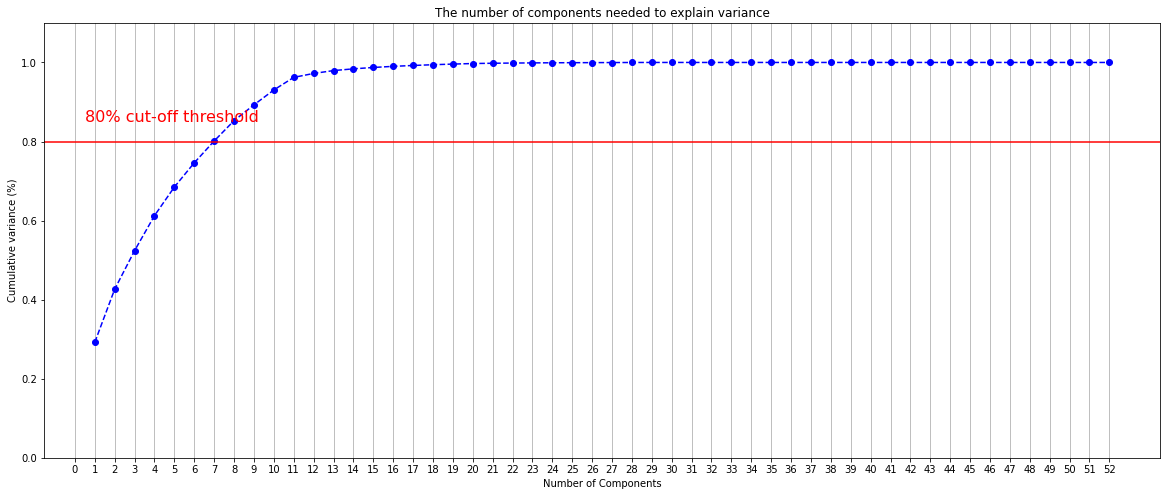

In [ ]:
# Visualisasi Cumulative Varians terhadap N_Components (80%)

pca = PCA().fit(scaled_data)
plt.rcParams["figure.figsize"] = (20,8)

fig,ax = plt.subplots()
xi = np.arange(1, 53, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1) 
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 53, step=1))

plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.80, color ='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color ='red', fontsize =16)

ax.grid(axis='x')
plt.show()


In [ ]:
pca_80 = PCA(n_components=7)
pca_80.fit(scaled_data)

PCA(n_components=7)

In [ ]:
pca_80.explained_variance_ratio_

array([0.29219445, 0.13429436, 0.0974807 , 0.08850176, 0.07248716,
       0.06119376, 0.05519946])

Text(0.5, 1.0, 'Component Variance (80%)')

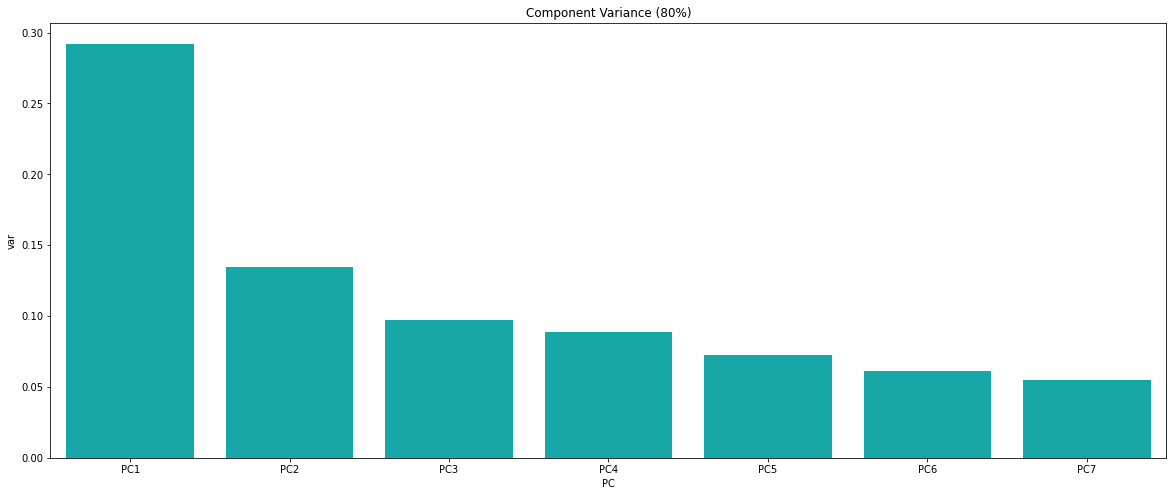

In [ ]:
# Visualisasi komponen pca (80%)
df_cv_80 = pd.DataFrame({'var':pca_80.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7']})

sns.barplot(x='PC',y='var',data=df_cv_80,
            color="c").set_title('Component Variance (80%)')

In [ ]:
dt_pca_80 = pca_80.transform(scaled_data)
dt_pca_80

array([[-0.46460249, -0.24407915,  0.02230682, ...,  1.01377474,
        -0.798495  , -0.01986024],
       [ 0.90154648,  0.01698963, -0.00660184, ...,  0.00225016,
         0.00771021,  0.00315091],
       [-0.42930726, -0.20006394,  0.07431186, ...,  0.42913226,
         0.68838877,  1.10559529],
       ...,
       [-0.50638957, -0.41540787, -0.08328781, ..., -0.65814652,
         0.01742966,  0.07132291],
       [-0.60619883, -0.49937024,  1.16586989, ...,  0.02550418,
         0.42444239,  1.03110793],
       [-0.50638957, -0.41540787, -0.08328781, ..., -0.65814652,
         0.01742966,  0.07132291]])

In [ ]:
df_pca_80 = pd.DataFrame(dt_pca_80, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
df_pca_80

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0    -0.464602 -0.244079  0.022307  0.371302  1.013775 -0.798495 -0.019860
1     0.901546  0.016990 -0.006602 -0.001536  0.002250  0.007710  0.003151
2    -0.429307 -0.200064  0.074312 -0.035935  0.429132  0.688389  1.105595
3    -0.429307 -0.200064  0.074312 -0.035935  0.429132  0.688389  1.105595
4     0.895206  0.066016  0.005777 -0.006732 -0.005270  0.010115 -0.000920
...        ...       ...       ...       ...       ...       ...       ...
5869 -0.606199 -0.499370  1.165870 -0.546437  0.025504  0.424442  1.031108
5870 -0.606199 -0.499370  1.165870 -0.546437  0.025504  0.424442  1.031108
5871 -0.506390 -0.415408 -0.083288  1.055402 -0.658147  0.017430  0.071323
5872 -0.606199 -0.499370  1.165870 -0.546437  0.025504  0.424442  1.031108
5873 -0.506390 -0.415408 -0.083288  1.055402 -0.658147  0.017430  0.071323

[5874 rows x 7 columns]

In [ ]:
# Visualisasi PCA 3d
import plotly.express as px

fig = px.scatter_3d(dt_pca_80, x=0, y=1, z=2,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_80.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    dt_pca_80,
    labels=labels,
    dimensions=range(7)
)
fig.update_traces(diagonal_visible=False)
fig.show()

[6046.665722726554]
[6046.665722726554, 3794.9612453856316]
[6046.665722726554, 3794.9612453856316, 3020.0753424552668]
[6046.665722726554, 3794.9612453856316, 3020.0753424552668, 2321.5885821512647]
[6046.665722726554, 3794.9612453856316, 3020.0753424552668, 2321.5885821512647, 1979.8905497285737]
[6046.665722726554, 3794.9612453856316, 3020.0753424552668, 2321.5885821512647, 1979.8905497285737, 1683.256204772798]


/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).



[6046.665722726554, 3794.9612453856316, 3020.0753424552668, 2321.5885821512647, 1979.8905497285737, 1683.256204772798, 1038.1506075721513]


/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 8 is empty! self.labels_[self.medoid_indices_[8]] may not be labeled with its corresponding cluster (8).



[6046.665722726554, 3794.9612453856316, 3020.0753424552668, 2321.5885821512647, 1979.8905497285737, 1683.256204772798, 1038.1506075721513, 737.5961729617958]


/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 8 is empty! self.labels_[self.medoid_indices_[8]] may not be labeled with its corresponding cluster (8).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 9 is empty! self.labels_[self.medoid_indices_[9]] may not be labeled with its corresponding cluster (9).



[6046.665722726554, 3794.9612453856316, 3020.0753424552668, 2321.5885821512647, 1979.8905497285737, 1683.256204772798, 1038.1506075721513, 737.5961729617958, 694.484443341956]


/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 8 is empty! self.labels_[self.medoid_indices_[8]] may not be labeled with its corresponding cluster (8).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 9 is empty! self.labels_[self.medoid_indices_[9]] may not be labeled with its corresponding cluster (9).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 10 is empty! self.labels_[self.medoid_indices_[10]] may not be labeled with its corresponding cluster (10).



[6046.665722726554, 3794.9612453856316, 3020.0753424552668, 2321.5885821512647, 1979.8905497285737, 1683.256204772798, 1038.1506075721513, 737.5961729617958, 694.484443341956, 680.125915452237]


/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 8 is empty! self.labels_[self.medoid_indices_[8]] may not be labeled with its corresponding cluster (8).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 9 is empty! self.labels_[self.medoid_indices_[9]] may not be labeled with its corresponding cluster (9).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 10 is empty! self.labels_[self.medoid_indices_[10]] may not be labeled with its corresponding cluster (10).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 11 is empty! self.labels_[self.medoid_indices_[11]] may not be 

[6046.665722726554, 3794.9612453856316, 3020.0753424552668, 2321.5885821512647, 1979.8905497285737, 1683.256204772798, 1038.1506075721513, 737.5961729617958, 694.484443341956, 680.125915452237, 678.0051162552182]


/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 8 is empty! self.labels_[self.medoid_indices_[8]] may not be labeled with its corresponding cluster (8).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 9 is empty! self.labels_[self.medoid_indices_[9]] may not be labeled with its corresponding cluster (9).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 10 is empty! self.labels_[self.medoid_indices_[10]] may not be labeled with its corresponding cluster (10).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 11 is empty! self.labels_[self.medoid_indices_[11]] may not be 

[6046.665722726554, 3794.9612453856316, 3020.0753424552668, 2321.5885821512647, 1979.8905497285737, 1683.256204772798, 1038.1506075721513, 737.5961729617958, 694.484443341956, 680.125915452237, 678.0051162552182, 677.5577669272604]


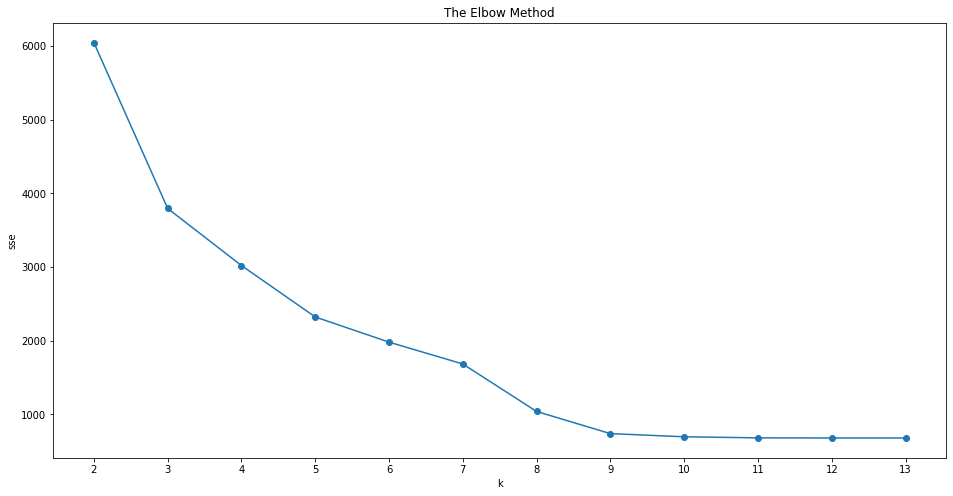

In [ ]:
# elbow method (range 2-20)
ssd_802 = []
K = range(2,14)
for k in K:
    kmedoids = KMedoids(n_clusters=k)
    kmedoids.fit(dt_pca_80)
    ssd_802.append(kmedoids.inertia_)
    print(ssd_802)
plt.figure(figsize=(16,8))
plt.plot(range(2,14),ssd_802, marker='o')
plt.xticks(range(2,14))
plt.xlabel('k')
plt.ylabel('sse')
plt.title('The Elbow Method')
plt.show()

[0.3175751464490864]
[0.3175751464490864, 0.5462393296695373]
[0.3175751464490864, 0.5462393296695373, 0.6050947174617453]
[0.3175751464490864, 0.5462393296695373, 0.6050947174617453, 0.6805438638285699]
[0.3175751464490864, 0.5462393296695373, 0.6050947174617453, 0.6805438638285699, 0.7235619628344886]
[0.3175751464490864, 0.5462393296695373, 0.6050947174617453, 0.6805438638285699, 0.7235619628344886, 0.7606178444900656]


/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).



[0.3175751464490864, 0.5462393296695373, 0.6050947174617453, 0.6805438638285699, 0.7235619628344886, 0.7606178444900656, 0.8367027071086895]


/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 8 is empty! self.labels_[self.medoid_indices_[8]] may not be labeled with its corresponding cluster (8).



[0.3175751464490864, 0.5462393296695373, 0.6050947174617453, 0.6805438638285699, 0.7235619628344886, 0.7606178444900656, 0.8367027071086895, 0.8673597864455207]


/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 8 is empty! self.labels_[self.medoid_indices_[8]] may not be labeled with its corresponding cluster (8).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 9 is empty! self.labels_[self.medoid_indices_[9]] may not be labeled with its corresponding cluster (9).



[0.3175751464490864, 0.5462393296695373, 0.6050947174617453, 0.6805438638285699, 0.7235619628344886, 0.7606178444900656, 0.8367027071086895, 0.8673597864455207, 0.8546968179493033]


/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 8 is empty! self.labels_[self.medoid_indices_[8]] may not be labeled with its corresponding cluster (8).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 9 is empty! self.labels_[self.medoid_indices_[9]] may not be labeled with its corresponding cluster (9).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 10 is empty! self.labels_[self.medoid_indices_[10]] may not be labeled with its corresponding cluster (10).



[0.3175751464490864, 0.5462393296695373, 0.6050947174617453, 0.6805438638285699, 0.7235619628344886, 0.7606178444900656, 0.8367027071086895, 0.8673597864455207, 0.8546968179493033, 0.8633407654460274]


/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 8 is empty! self.labels_[self.medoid_indices_[8]] may not be labeled with its corresponding cluster (8).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 9 is empty! self.labels_[self.medoid_indices_[9]] may not be labeled with its corresponding cluster (9).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 10 is empty! self.labels_[self.medoid_indices_[10]] may not be labeled with its corresponding cluster (10).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 11 is empty! self.labels_[self.medoid_indices_[11]] may not be 

[0.3175751464490864, 0.5462393296695373, 0.6050947174617453, 0.6805438638285699, 0.7235619628344886, 0.7606178444900656, 0.8367027071086895, 0.8673597864455207, 0.8546968179493033, 0.8633407654460274, 0.8633649330394455]


/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 8 is empty! self.labels_[self.medoid_indices_[8]] may not be labeled with its corresponding cluster (8).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 9 is empty! self.labels_[self.medoid_indices_[9]] may not be labeled with its corresponding cluster (9).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 10 is empty! self.labels_[self.medoid_indices_[10]] may not be labeled with its corresponding cluster (10).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 11 is empty! self.labels_[self.medoid_indices_[11]] may not be 

[0.3175751464490864, 0.5462393296695373, 0.6050947174617453, 0.6805438638285699, 0.7235619628344886, 0.7606178444900656, 0.8367027071086895, 0.8673597864455207, 0.8546968179493033, 0.8633407654460274, 0.8633649330394455, 0.8626719334082703]


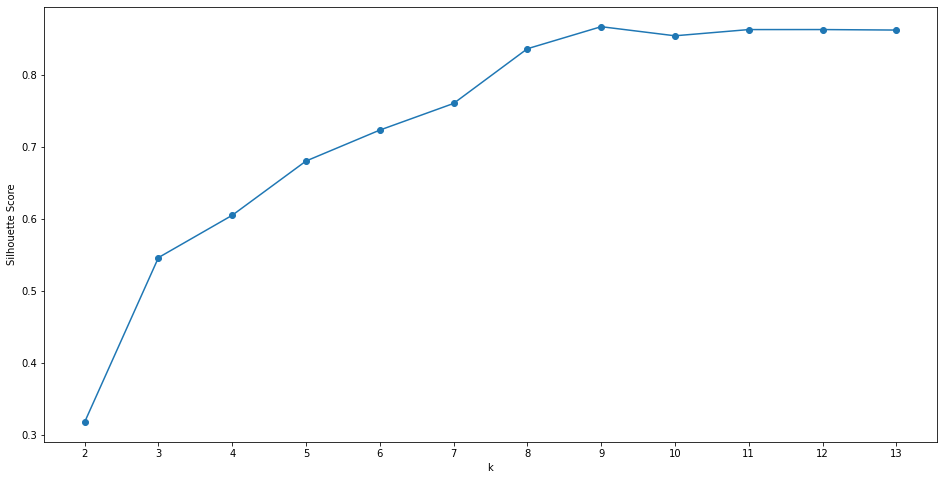

In [ ]:
# Silhouette Analysis (80% = 7 komponen pca)
from sklearn.metrics import silhouette_score
silhouette_coefficients_802 = []
for k in range(2, 14):
    kmedoids = KMedoids(n_clusters=k)
    kmedoids.fit(dt_pca_80)
    score = silhouette_score(dt_pca_80, kmedoids.labels_)
    silhouette_coefficients_802.append(score)
    print(silhouette_coefficients_802)
  
plt.figure(figsize=(16,8))
plt.plot(range(2, 14), silhouette_coefficients_802, marker='o')
plt.xticks(range(2, 14))
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
# K-Medoids Clustering (Library)

# 80%
kmedoids_80 = KMedoids(n_clusters=9).fit(dt_pca_80)
cluster_labels_80 = kmedoids_80.labels_
centers_labels_80 = kmedoids_80.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 8 is empty! self.labels_[self.medoid_indices_[8]] may not be labeled with its corresponding cluster (8).



In [ ]:
scorelib_80 = silhouette_score(dt_pca_80, cluster_labels_80)
scorelib_80

0.8673597864455207

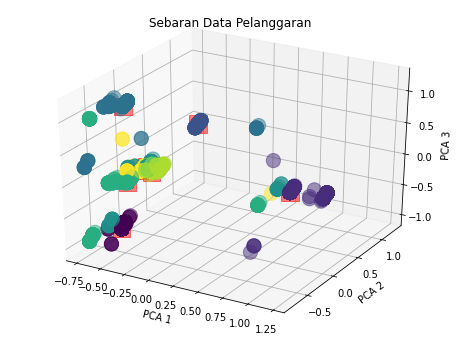

In [ ]:
#Visualisasi Klaster Library (80% varians data)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dt_pca_80[:, 0],dt_pca_80[:, 1],dt_pca_80[:, 2], s=200, c = cluster_labels_80, alpha=0.5)
ax.scatter(centers_labels_80[:, 0],centers_labels_80[:, 1],centers_labels_80[:, 2], s=300, c = 'red', alpha=0.5, marker = 's')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3') 
plt.title('Sebaran Data Pelanggaran')
plt.show()

In [ ]:
df_libs = dfs.copy()
df_liba = dfa.copy()
df_libs['cluster'] = cluster_labels_80
df_libs

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

           pasal_hukuman        pasal_tuntutan  \
0                  ps280               ps68(1)   
1               ps287(1)             ps106(4)a   
2               ps288(2)             ps106(5)b   
3               ps288(2)             ps106(5)b   
4               ps287(1)             ps106(4)a   
...                  ...                   ...   
5869  ps288(2), ps288(1)  ps106(5)b, ps106(5)a   
5870  ps288(2), ps288(1)  ps106(5)b, ps106(5)a   
5871               ps281               ps77(1)   
5872  ps288(2), ps288(1)  ps106(5)b, ps106(5)a   
5873               ps281               ps77(1)   

                             merge_var  cluster  
0                  ps280, SEPEDA MOTOR        8  
1               ps287(1), SEPEDA MOTOR        1  
2               ps288(2), SEPEDA MOTOR        4  
3               ps288(2), SEPEDA MOTOR        4  
4       ps287(1), MOBIL BARANG/PICK UP        1  
...                                ...      ...  
5869  ps288(2), ps288(1), SEPEDA MOTOR        3  
5870  ps288(2), ps288(1), SEPEDA MOTOR        3  
5871               ps281, SEPEDA MOTOR        5  
5872  ps288(2), ps288(1), SEPEDA MOTOR        3  
5873               ps281, SEPEDA MOTOR        5  

[5874 rows x 6 columns]

In [ ]:
df_liba['cluster'] = cluster_labels_80
df_liba

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

                                 pasal_hukuman         pasal_tuntutan  \
0                         Tidak dipasangi TNKB             Plat palsu   
1                        Melanggar rambu lalin            Rambu-rambu   
2                     Tidak memperlihatkan SIM        Menunjukkan SIM   
3                     Tidak memperlihatkan SIM        Menunjukkan SIM   
4                        Melanggar rambu lalin            Rambu-rambu   
...                                        ...                    ...   
5869  Tidak memperlihatkan SIM, Tidak ada STNK  Menunjukkan SIM, STNK   
5870  Tidak memperlihatkan SIM, Tidak ada STNK  Menunjukkan SIM, STNK   
5871                                    No SIM        Kepemilikan SIM   
5872  Tidak memperlihatkan SIM, Tidak ada STNK  Menunjukkan SIM, STNK   
5873                                    No SIM        Kepemilikan SIM   

                                              merge_var  cluster  
0                    Tidak dipasangi TNKB, SEPEDA MOTOR        8  
1                   Melanggar rambu lalin, SEPEDA MOTOR        1  
2                Tidak memperlihatkan SIM, SEPEDA MOTOR        4  
3                Tidak memperlihatkan SIM, SEPEDA MOTOR        4  
4           Melanggar rambu lalin, MOBIL BARANG/PICK UP        1  
...                                                 ...      ...  
5869  Tidak memperlihatkan SIM, Tidak ada STNK, SEPE...        3  
5870  Tidak memperlihatkan SIM, Tidak ada STNK, SEPE...        3  
5871                               No SIM, SEPEDA MOTOR        5  
5872  Tidak memperlihatkan SIM, Tidak ada STNK, SEPE...        3  
5873                               No SIM, SEPEDA MOTOR        5  

[5874 rows x 6 columns]

In [ ]:
df_db = df.copy()
df_db.drop('pasal_hukuman', axis=1, inplace=True)
df_db.drop('pasal_tuntutan', axis=1, inplace=True)
df_db['cluster'] = cluster_labels_80
df_db

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

      cluster  
0           8  
1           1  
2           4  
3           4  
4           1  
...       ...  
5869        3  
5870        3  
5871        5  
5872        3  
5873        5  

[5874 rows x 3 columns]

In [ ]:
df_library = df.copy()
df_library['cluster'] = cluster_labels_80
df_library

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

                                 pasal_hukuman  \
0                                  [pasal 280]   
1                         [pasal 287 ayat (1)]   
2                         [pasal 288 ayat (2)]   
3                         [pasal 288 ayat (2)]   
4                         [pasal 287 ayat (1)]   
...                                        ...   
5869  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5870  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5871                               [pasal 281]   
5872  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5873                               [pasal 281]   

                                         pasal_tuntutan  cluster  
0                                   [pasal 68 ayat (1)]        8  
1                          [pasal 106 ayat (4) huruf a]        1  
2                          [pasal 106 ayat (5) huruf b]        4  
3                          [pasal 106 ayat (5) huruf b]        4  
4                          [pasal 106 ayat (4) huruf a]        1  
...                                                 ...      ...  
5869  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...        3  
5870  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...        3  
5871                                [pasal 77 ayat (1)]        5  
5872  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...        3  
5873                                [pasal 77 ayat (1)]        5  

[5874 rows x 5 columns]

In [ ]:
# 2d
fig = px.scatter(dt_pca_80, x=0, y=1, color=df_library['cluster'])
fig.show()

In [ ]:
# Visualisasi 3d klaster
fig = px.scatter_3d(dt_pca_80, x=0, y=1, z=2, color=df_library['cluster'],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
# Euclidean Distance
def euclideanDistance (x,y):
  squared_ed = 0
  for i in range (len(x)):
    squared_ed += (x[i] - y[i])**2
  ed = np.sqrt(squared_ed)
  return ed

In [ ]:
# Class K-Medoids Clustering
class k_medoids:

  # Class constructor
  def __init__(self, k = 9, max_iter = 300, has_converged = False):
    self.k = k
    self.max_iter = max_iter
    self.has_converged = has_converged
    self.medoids_cost = []
  
  # Inisialisasi Medoids
  def initMedoids(self,X):
    self.medoids =[]

    # Menentukan medoid scr acak dari dataset
    indexs = np.random.randint(0, len(X)-1, self.k)
    self.medoids = X[indexs]
    
    for i in range (0, self.k):
      self.medoids_cost.append(0)
  
  # Memeriksa apakah medoids masih mengalami perpindahan atau tdk
  def isConverged(self, new_medoids):
    # param new_medoids = medoids baru yang sudah dibandingkan dengan medoid yang sudah ada
    return set([tuple(x) for x in self.medoids]) == set([tuple(x) for x in new_medoids])
  
  # Melakukan update jika ada perubahan medoids
  def updateMedoids(self, X, labels):
    self.has_converged = True

    #Menyimpan titik data pada cluster awalnya
    clusters = []

    for i in range(0, self.k):
      cluster = []
      
      for j in range(len(X)):
        if(labels[j] == i):
          cluster.append(X[j])
      clusters.append(cluster)
      

    
    # Menghitung nilai medoids baru
    new_medoids = []

    for m in range(0, self.k):
      new_medoid = self.medoids[m]
      old_medoids_cost = self.medoids_cost[m]
      print("Total cost :")
      print(old_medoids_cost)
      

      for n in range (len(clusters[m])):

        # total jarak anggota klaster baru akan dibandingkan dengan total jarak klaster lama
        cur_medoids_cost = 0
        for dpoint_index in range (len(clusters[m])):
          cur_medoids_cost += euclideanDistance(clusters[m][n], clusters[m][dpoint_index])
        
        '''
        jika total jarak baru lebih kecil dari total jarak lama,
        maka nilai titik data baru akan dijadikan sebagai titik data medoids baru dan 
        akan ditukar sehinggan total jarak lama = total jarak baru
        '''
        if cur_medoids_cost < old_medoids_cost:
          new_medoid = clusters[m][n]
          old_medoids_cost = cur_medoids_cost

      # Medoid optimal dalam klaster saat ini
      new_medoids.append(new_medoid)
      
      
    
    # Jika not converged, maka terima medoids baru
    if not self.isConverged(new_medoids):
      self.medoids = new_medoids
      self.has_converged = False
      print(np.array(new_medoids))
      

  # Membuat function fit untuk menemukan klaster tiap data
  def fit(self, X):
    
    self.initMedoids(X)
    print(self.medoids)
    

    for i in range(self.max_iter):
      # Labels untuk iterasi ini
      cur_labels = []

      for medoid in range (0, self.k): 
        # Ketidaksamaan/Dissimilarity nilai klaster saat ini 
        self.medoids_cost[medoid] = 0

        for k in range (len(X)):
          # Jarak dari titik data ke masing-masing medoid
          ed_list = []

          for j in range(0, self.k):
            ed_list.append(euclideanDistance(self.medoids[j], X[k]))

          
          # labels poin data merupakan medoids yang memiliki jarak yang paling minimum
          cur_labels.append(ed_list.index(min (ed_list)))

          self.medoids_cost[medoid] += min(ed_list)
          
      
      self.updateMedoids(X, cur_labels)

      if self.has_converged:
        break
    
    return np.array(self.medoids)

  # Membuat function predict untuk mendapatkan list klaster index pada data input
  def predict(self, data):
    pred = []

    for i in range (len(data)):
      # Jarak dari poin data ke setiap medoids
      ed_list = []
      
      for j in range(len(self.medoids)):
        ed_list.append(euclideanDistance(self.medoids[j], data[i] ))

      pred.append(ed_list.index(min(ed_list)))
    
    return np.array(pred)

In [ ]:
#K-Medoids Clustering Scratch

# Varians data 80%
model_80 = k_medoids(k=9)
meds_80 = model_80.fit(dt_pca_80)
pred_80 = model_80.predict(dt_pca_80)

[[-0.52934046 -0.40612733  1.08835567 -0.48803499 -0.27982165 -0.17980421
  -0.08838738]
 [-0.42930726 -0.20006394  0.07431186 -0.03593538  0.42913226  0.68838877
   1.10559529]
 [-0.50638957 -0.41540787 -0.08328781  1.05540233 -0.65814652  0.01742966
   0.07132291]
 [-0.43418123 -0.20962602  0.02226348  0.20116676  0.22861861  0.23158176
  -0.11150693]
 [-0.43418123 -0.20962602  0.02226348  0.20116676  0.22861861  0.23158176
  -0.11150693]
 [ 0.90154648  0.01698963 -0.00660184 -0.00153591  0.00225016  0.00771021
   0.00315091]
 [-0.39646172 -0.1729963  -0.01296945  0.04040416  0.24273666  0.19190408
  -0.03347113]
 [-0.39646172 -0.1729963  -0.01296945  0.04040416  0.24273666  0.19190408
  -0.03347113]
 [-0.43418123 -0.20962602  0.02226348  0.20116676  0.22861861  0.23158176
  -0.11150693]]
Total cost :
3277.8507444886777
Total cost :
3277.8507444886777
Total cost :
3277.8507444886777
Total cost :
3277.8507444886777
Total cost :
3277.8507444886777
Total cost :
3277.8507444886777
Total 

In [ ]:
# Silhouette score (80% varians data)
from sklearn.metrics import silhouette_score
score_80 = silhouette_score(dt_pca_80, pred_80)
score_80

0.8673597864455207

In [ ]:
df_clss = dfs.copy()
df_clsa = dfa.copy()
df_clss['cluster'] = pred_80
df_clss

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

           pasal_hukuman        pasal_tuntutan  \
0                  ps280               ps68(1)   
1               ps287(1)             ps106(4)a   
2               ps288(2)             ps106(5)b   
3               ps288(2)             ps106(5)b   
4               ps287(1)             ps106(4)a   
...                  ...                   ...   
5869  ps288(2), ps288(1)  ps106(5)b, ps106(5)a   
5870  ps288(2), ps288(1)  ps106(5)b, ps106(5)a   
5871               ps281               ps77(1)   
5872  ps288(2), ps288(1)  ps106(5)b, ps106(5)a   
5873               ps281               ps77(1)   

                             merge_var  cluster  
0                  ps280, SEPEDA MOTOR        4  
1               ps287(1), SEPEDA MOTOR        5  
2               ps288(2), SEPEDA MOTOR        1  
3               ps288(2), SEPEDA MOTOR        1  
4       ps287(1), MOBIL BARANG/PICK UP        5  
...                                ...      ...  
5869  ps288(2), ps288(1), SEPEDA MOTOR        0  
5870  ps288(2), ps288(1), SEPEDA MOTOR        0  
5871               ps281, SEPEDA MOTOR        2  
5872  ps288(2), ps288(1), SEPEDA MOTOR        0  
5873               ps281, SEPEDA MOTOR        2  

[5874 rows x 6 columns]

In [ ]:
df_clsa['cluster'] = pred_80
df_clsa

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

                                 pasal_hukuman         pasal_tuntutan  \
0                         Tidak dipasangi TNKB             Plat palsu   
1                        Melanggar rambu lalin            Rambu-rambu   
2                     Tidak memperlihatkan SIM        Menunjukkan SIM   
3                     Tidak memperlihatkan SIM        Menunjukkan SIM   
4                        Melanggar rambu lalin            Rambu-rambu   
...                                        ...                    ...   
5869  Tidak memperlihatkan SIM, Tidak ada STNK  Menunjukkan SIM, STNK   
5870  Tidak memperlihatkan SIM, Tidak ada STNK  Menunjukkan SIM, STNK   
5871                                    No SIM        Kepemilikan SIM   
5872  Tidak memperlihatkan SIM, Tidak ada STNK  Menunjukkan SIM, STNK   
5873                                    No SIM        Kepemilikan SIM   

                                              merge_var  cluster  
0                    Tidak dipasangi TNKB, SEPEDA MOTOR        4  
1                   Melanggar rambu lalin, SEPEDA MOTOR        5  
2                Tidak memperlihatkan SIM, SEPEDA MOTOR        1  
3                Tidak memperlihatkan SIM, SEPEDA MOTOR        1  
4           Melanggar rambu lalin, MOBIL BARANG/PICK UP        5  
...                                                 ...      ...  
5869  Tidak memperlihatkan SIM, Tidak ada STNK, SEPE...        0  
5870  Tidak memperlihatkan SIM, Tidak ada STNK, SEPE...        0  
5871                               No SIM, SEPEDA MOTOR        2  
5872  Tidak memperlihatkan SIM, Tidak ada STNK, SEPE...        0  
5873                               No SIM, SEPEDA MOTOR        2  

[5874 rows x 6 columns]

In [ ]:
df_dbs = df.copy()
df_dbs.drop('pasal_hukuman', axis=1, inplace=True)
df_dbs.drop('pasal_tuntutan', axis=1, inplace=True)
df_dbs['cluster'] = pred_80
df_dbs

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

      cluster  
0           4  
1           5  
2           1  
3           1  
4           5  
...       ...  
5869        0  
5870        0  
5871        2  
5872        0  
5873        2  

[5874 rows x 3 columns]

In [ ]:
df_scr = df.copy()
df_scr['cluster'] = pred_80
df_scr

pasal       jenis_kendaraan  \
0                        pasal 280 jo pasal 68 ayat (1)          SEPEDA MOTOR   
1      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b          SEPEDA MOTOR   
4      pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
...                                                 ...                   ...   
5869   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5870   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5871                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   
5872   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...          SEPEDA MOTOR   
5873                     pasal 281 jo pasal 77 ayat (1)          SEPEDA MOTOR   

                                 pasal_hukuman  \
0                                  [pasal 280]   
1                         [pasal 287 ayat (1)]   
2                         [pasal 288 ayat (2)]   
3                         [pasal 288 ayat (2)]   
4                         [pasal 287 ayat (1)]   
...                                        ...   
5869  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5870  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5871                               [pasal 281]   
5872  [pasal 288 ayat (2), pasal 288 ayat (1)]   
5873                               [pasal 281]   

                                         pasal_tuntutan  cluster  
0                                   [pasal 68 ayat (1)]        4  
1                          [pasal 106 ayat (4) huruf a]        5  
2                          [pasal 106 ayat (5) huruf b]        1  
3                          [pasal 106 ayat (5) huruf b]        1  
4                          [pasal 106 ayat (4) huruf a]        5  
...                                                 ...      ...  
5869  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...        0  
5870  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...        0  
5871                                [pasal 77 ayat (1)]        2  
5872  [pasal 106 ayat (5) huruf b, pasal 106 ayat (5...        0  
5873                                [pasal 77 ayat (1)]        2  

[5874 rows x 5 columns]

<function matplotlib.pyplot.show(*args, **kw)>

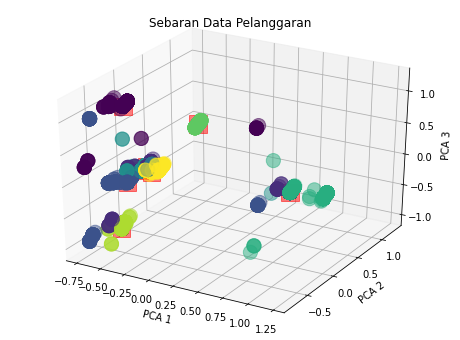

In [ ]:
#Visualisasi Klaster (80% varians data)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dt_pca_80[:, 0],dt_pca_80[:, 1],dt_pca_80[:, 2], s=200, c = pred_80, alpha=0.5)
centers = meds_80
ax.scatter(centers[:, 0],centers[:, 1],centers[:, 2], s=300, c = 'red', alpha=0.5, marker = 's')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3') 
plt.title('Sebaran Data Pelanggaran')
plt.show

In [ ]:
# Visualisasi 2d Klaster
fig = px.scatter(dt_pca_80, x=0, y=1, color=df_scr['cluster'])
fig.show()

In [ ]:
# Visualisasi 3d klaster
fig = px.scatter_3d(dt_pca_80, x=0, y=1, z=2, color=df_scr['cluster'],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
# cluster 0
cluster_0 = df_scr.loc[df_scr['cluster'] == 0]
print(cluster_0.shape)
cluster_0.head()

(531, 5)


pasal jenis_kendaraan  \
12   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a    SEPEDA MOTOR   
18   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a    SEPEDA MOTOR   
25   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a     TRUCK KECIL   
34   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a    SEPEDA MOTOR   
35   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a    SEPEDA MOTOR   

           pasal_hukuman                pasal_tuntutan  cluster  
12  [pasal 288 ayat (1)]  [pasal 106 ayat (5) huruf a]        0  
18  [pasal 288 ayat (1)]  [pasal 106 ayat (5) huruf a]        0  
25  [pasal 288 ayat (1)]  [pasal 106 ayat (5) huruf a]        0  
34  [pasal 288 ayat (1)]  [pasal 106 ayat (5) huruf a]        0  
35  [pasal 288 ayat (1)]  [pasal 106 ayat (5) huruf a]        0

In [ ]:
cluster_0a = df_clss.loc[df_clss['cluster'] == 0]
print(cluster_0a.shape)
cluster_0a.head()

(531, 6)


pasal jenis_kendaraan  \
12   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a    SEPEDA MOTOR   
18   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a    SEPEDA MOTOR   
25   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a     TRUCK KECIL   
34   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a    SEPEDA MOTOR   
35   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a    SEPEDA MOTOR   

   pasal_hukuman pasal_tuntutan               merge_var  cluster  
12      ps288(1)      ps106(5)a  ps288(1), SEPEDA MOTOR        0  
18      ps288(1)      ps106(5)a  ps288(1), SEPEDA MOTOR        0  
25      ps288(1)      ps106(5)a   ps288(1), TRUCK KECIL        0  
34      ps288(1)      ps106(5)a  ps288(1), SEPEDA MOTOR        0  
35      ps288(1)      ps106(5)a  ps288(1), SEPEDA MOTOR        0

In [ ]:
cluster_0b = df_clsa.loc[df_clsa['cluster'] == 0]
print(cluster_0b.shape)
cluster_0b.head()

(531, 6)


pasal jenis_kendaraan  \
12   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a    SEPEDA MOTOR   
18   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a    SEPEDA MOTOR   
25   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a     TRUCK KECIL   
34   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a    SEPEDA MOTOR   
35   pasal 288 ayat (1) jo pasal 106 ayat (5) huruf a    SEPEDA MOTOR   

     pasal_hukuman pasal_tuntutan                     merge_var  cluster  
12  Tidak ada STNK           STNK  Tidak ada STNK, SEPEDA MOTOR        0  
18  Tidak ada STNK           STNK  Tidak ada STNK, SEPEDA MOTOR        0  
25  Tidak ada STNK           STNK   Tidak ada STNK, TRUCK KECIL        0  
34  Tidak ada STNK           STNK  Tidak ada STNK, SEPEDA MOTOR        0  
35  Tidak ada STNK           STNK  Tidak ada STNK, SEPEDA MOTOR        0

In [ ]:
# cluster 1
cluster_1 = df_scr.loc[df_scr['cluster'] == 1]
print(cluster_1.shape)
cluster_1.head()

(289, 5)


pasal      jenis_kendaraan  \
2    pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b         SEPEDA MOTOR   
3    pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b         SEPEDA MOTOR   
10   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b         SEPEDA MOTOR   
19   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b  MKL/MOBIL PENUMPANG   
50   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b  MKL/MOBIL PENUMPANG   

           pasal_hukuman                pasal_tuntutan  cluster  
2   [pasal 288 ayat (2)]  [pasal 106 ayat (5) huruf b]        1  
3   [pasal 288 ayat (2)]  [pasal 106 ayat (5) huruf b]        1  
10  [pasal 288 ayat (2)]  [pasal 106 ayat (5) huruf b]        1  
19  [pasal 288 ayat (2)]  [pasal 106 ayat (5) huruf b]        1  
50  [pasal 288 ayat (2)]  [pasal 106 ayat (5) huruf b]        1

In [ ]:
cluster_1a = df_clss.loc[df_clss['cluster'] == 1]
print(cluster_1a.shape)
cluster_1a.head()

(289, 6)


pasal      jenis_kendaraan  \
2    pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b         SEPEDA MOTOR   
3    pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b         SEPEDA MOTOR   
10   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b         SEPEDA MOTOR   
19   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b  MKL/MOBIL PENUMPANG   
50   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b  MKL/MOBIL PENUMPANG   

   pasal_hukuman pasal_tuntutan                      merge_var  cluster  
2       ps288(2)      ps106(5)b         ps288(2), SEPEDA MOTOR        1  
3       ps288(2)      ps106(5)b         ps288(2), SEPEDA MOTOR        1  
10      ps288(2)      ps106(5)b         ps288(2), SEPEDA MOTOR        1  
19      ps288(2)      ps106(5)b  ps288(2), MKL/MOBIL PENUMPANG        1  
50      ps288(2)      ps106(5)b  ps288(2), MKL/MOBIL PENUMPANG        1

In [ ]:
cluster_1b = df_clsa.loc[df_clsa['cluster'] == 1]
print(cluster_1b.shape)
cluster_1b.head()

(289, 6)


pasal      jenis_kendaraan  \
2    pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b         SEPEDA MOTOR   
3    pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b         SEPEDA MOTOR   
10   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b         SEPEDA MOTOR   
19   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b  MKL/MOBIL PENUMPANG   
50   pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b  MKL/MOBIL PENUMPANG   

               pasal_hukuman   pasal_tuntutan  \
2   Tidak memperlihatkan SIM  Menunjukkan SIM   
3   Tidak memperlihatkan SIM  Menunjukkan SIM   
10  Tidak memperlihatkan SIM  Menunjukkan SIM   
19  Tidak memperlihatkan SIM  Menunjukkan SIM   
50  Tidak memperlihatkan SIM  Menunjukkan SIM   

                                        merge_var  cluster  
2          Tidak memperlihatkan SIM, SEPEDA MOTOR        1  
3          Tidak memperlihatkan SIM, SEPEDA MOTOR        1  
10         Tidak memperlihatkan SIM, SEPEDA MOTOR        1  
19  Tidak memperlihatkan SIM, MKL/MOBIL PENUMPANG        1  
50  Tidak memperlihatkan SIM, MKL/MOBIL PENUMPANG        1

In [ ]:
# cluster 2
cluster_2 = df_scr.loc[df_scr['cluster'] == 2]
print(cluster_2.shape)
cluster_2.head()

(501, 5)


pasal jenis_kendaraan  \
76                      pasal 281 jo pasal 77 ayat (1)    SEPEDA MOTOR   
93                      pasal 281 jo pasal 77 ayat (1)    SEPEDA MOTOR   
94                      pasal 281 jo pasal 77 ayat (1)    SEPEDA MOTOR   
103   pasal 281 jo pasal 77 ayat (1),pasal 287 ayat...    SEPEDA MOTOR   
121                     pasal 281 jo pasal 77 ayat (1)    SEPEDA MOTOR   

                       pasal_hukuman  \
76                       [pasal 281]   
93                       [pasal 281]   
94                       [pasal 281]   
103  [pasal 281, pasal 287 ayat (1)]   
121                      [pasal 281]   

                                      pasal_tuntutan  cluster  
76                               [pasal 77 ayat (1)]        2  
93                               [pasal 77 ayat (1)]        2  
94                               [pasal 77 ayat (1)]        2  
103  [pasal 77 ayat (1), pasal 106 ayat (4) huruf a]        2  
121                              [pasal 77 ayat (1)]        2

In [ ]:
cluster_2a = df_clss.loc[df_clss['cluster'] == 2]
print(cluster_2a.shape)
cluster_2a.head()

(501, 6)


pasal jenis_kendaraan  \
76                      pasal 281 jo pasal 77 ayat (1)    SEPEDA MOTOR   
93                      pasal 281 jo pasal 77 ayat (1)    SEPEDA MOTOR   
94                      pasal 281 jo pasal 77 ayat (1)    SEPEDA MOTOR   
103   pasal 281 jo pasal 77 ayat (1),pasal 287 ayat...    SEPEDA MOTOR   
121                     pasal 281 jo pasal 77 ayat (1)    SEPEDA MOTOR   

       pasal_hukuman      pasal_tuntutan                      merge_var  \
76             ps281             ps77(1)            ps281, SEPEDA MOTOR   
93             ps281             ps77(1)            ps281, SEPEDA MOTOR   
94             ps281             ps77(1)            ps281, SEPEDA MOTOR   
103  ps281, ps287(1)  ps77(1), ps106(4)a  ps281, ps287(1), SEPEDA MOTOR   
121            ps281             ps77(1)            ps281, SEPEDA MOTOR   

     cluster  
76         2  
93         2  
94         2  
103        2  
121        2

In [ ]:
cluster_2b = df_clsa.loc[df_clsa['cluster'] == 2]
print(cluster_2b.shape)
cluster_2b.head()

(501, 6)


pasal jenis_kendaraan  \
76                      pasal 281 jo pasal 77 ayat (1)    SEPEDA MOTOR   
93                      pasal 281 jo pasal 77 ayat (1)    SEPEDA MOTOR   
94                      pasal 281 jo pasal 77 ayat (1)    SEPEDA MOTOR   
103   pasal 281 jo pasal 77 ayat (1),pasal 287 ayat...    SEPEDA MOTOR   
121                     pasal 281 jo pasal 77 ayat (1)    SEPEDA MOTOR   

                     pasal_hukuman                pasal_tuntutan  \
76                          No SIM               Kepemilikan SIM   
93                          No SIM               Kepemilikan SIM   
94                          No SIM               Kepemilikan SIM   
103  No SIM, Melanggar rambu lalin  Kepemilikan SIM, Rambu-rambu   
121                         No SIM               Kepemilikan SIM   

                                       merge_var  cluster  
76                          No SIM, SEPEDA MOTOR        2  
93                          No SIM, SEPEDA MOTOR        2  
94                          No SIM, SEPEDA MOTOR        2  
103  No SIM, Melanggar rambu lalin, SEPEDA MOTOR        2  
121                         No SIM, SEPEDA MOTOR        2

In [ ]:
# cluster 3
cluster_3 = df_scr.loc[df_scr['cluster'] == 3]
print(cluster_3.shape)
cluster_3.head()

(295, 5)


pasal jenis_kendaraan  \
21   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c        MINI BUS   
27   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c    SEPEDA MOTOR   
31   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c        MINI BUS   
33   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c    SEPEDA MOTOR   
47   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c    SEPEDA MOTOR   

           pasal_hukuman                pasal_tuntutan  cluster  
21  [pasal 287 ayat (2)]  [pasal 106 ayat (4) huruf c]        3  
27  [pasal 287 ayat (2)]  [pasal 106 ayat (4) huruf c]        3  
31  [pasal 287 ayat (2)]  [pasal 106 ayat (4) huruf c]        3  
33  [pasal 287 ayat (2)]  [pasal 106 ayat (4) huruf c]        3  
47  [pasal 287 ayat (2)]  [pasal 106 ayat (4) huruf c]        3

In [ ]:
cluster_3a = df_clss.loc[df_clss['cluster'] == 3]
print(cluster_3a.shape)
cluster_3a.head()

(295, 6)


pasal jenis_kendaraan  \
21   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c        MINI BUS   
27   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c    SEPEDA MOTOR   
31   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c        MINI BUS   
33   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c    SEPEDA MOTOR   
47   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c    SEPEDA MOTOR   

   pasal_hukuman pasal_tuntutan               merge_var  cluster  
21      ps287(2)      ps106(4)c      ps287(2), MINI BUS        3  
27      ps287(2)      ps106(4)c  ps287(2), SEPEDA MOTOR        3  
31      ps287(2)      ps106(4)c      ps287(2), MINI BUS        3  
33      ps287(2)      ps106(4)c  ps287(2), SEPEDA MOTOR        3  
47      ps287(2)      ps106(4)c  ps287(2), SEPEDA MOTOR        3

In [ ]:
cluster_3b = df_clsa.loc[df_clsa['cluster'] == 3]
print(cluster_3b.shape)
cluster_3b.head()

(295, 6)


pasal jenis_kendaraan  \
21   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c        MINI BUS   
27   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c    SEPEDA MOTOR   
31   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c        MINI BUS   
33   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c    SEPEDA MOTOR   
47   pasal 287 ayat (2) jo pasal 106 ayat (4) huruf c    SEPEDA MOTOR   

              pasal_hukuman      pasal_tuntutan  \
21  Melanggar isyarat lalin  Alat isyarat lalin   
27  Melanggar isyarat lalin  Alat isyarat lalin   
31  Melanggar isyarat lalin  Alat isyarat lalin   
33  Melanggar isyarat lalin  Alat isyarat lalin   
47  Melanggar isyarat lalin  Alat isyarat lalin   

                                merge_var  cluster  
21      Melanggar isyarat lalin, MINI BUS        3  
27  Melanggar isyarat lalin, SEPEDA MOTOR        3  
31      Melanggar isyarat lalin, MINI BUS        3  
33  Melanggar isyarat lalin, SEPEDA MOTOR        3  
47  Melanggar isyarat lalin, SEPEDA MOTOR        3

In [ ]:
# cluster 4
cluster_4 = df_scr.loc[df_scr['cluster'] == 4]
print(cluster_4.shape)
cluster_4.head()

(339, 5)


pasal jenis_kendaraan pasal_hukuman  \
0    pasal 280 jo pasal 68 ayat (1)    SEPEDA MOTOR   [pasal 280]   
5    pasal 280 jo pasal 68 ayat (1)    SEPEDA MOTOR   [pasal 280]   
40   pasal 280 jo pasal 68 ayat (1)        MINI BUS   [pasal 280]   
58   pasal 280 jo pasal 68 ayat (1)        MINI BUS   [pasal 280]   
83   pasal 280 jo pasal 68 ayat (1)        MINI BUS   [pasal 280]   

         pasal_tuntutan  cluster  
0   [pasal 68 ayat (1)]        4  
5   [pasal 68 ayat (1)]        4  
40  [pasal 68 ayat (1)]        4  
58  [pasal 68 ayat (1)]        4  
83  [pasal 68 ayat (1)]        4

In [ ]:
cluster_4a = df_clss.loc[df_clss['cluster'] == 4]
print(cluster_4a.shape)
cluster_4a.head()

(339, 6)


pasal jenis_kendaraan pasal_hukuman  \
0    pasal 280 jo pasal 68 ayat (1)    SEPEDA MOTOR         ps280   
5    pasal 280 jo pasal 68 ayat (1)    SEPEDA MOTOR         ps280   
40   pasal 280 jo pasal 68 ayat (1)        MINI BUS         ps280   
58   pasal 280 jo pasal 68 ayat (1)        MINI BUS         ps280   
83   pasal 280 jo pasal 68 ayat (1)        MINI BUS         ps280   

   pasal_tuntutan            merge_var  cluster  
0         ps68(1)  ps280, SEPEDA MOTOR        4  
5         ps68(1)  ps280, SEPEDA MOTOR        4  
40        ps68(1)      ps280, MINI BUS        4  
58        ps68(1)      ps280, MINI BUS        4  
83        ps68(1)      ps280, MINI BUS        4

In [ ]:
cluster_4b = df_clsa.loc[df_clsa['cluster'] == 4]
print(cluster_4b.shape)
cluster_4b.head()

(339, 6)


pasal jenis_kendaraan         pasal_hukuman  \
0    pasal 280 jo pasal 68 ayat (1)    SEPEDA MOTOR  Tidak dipasangi TNKB   
5    pasal 280 jo pasal 68 ayat (1)    SEPEDA MOTOR  Tidak dipasangi TNKB   
40   pasal 280 jo pasal 68 ayat (1)        MINI BUS  Tidak dipasangi TNKB   
58   pasal 280 jo pasal 68 ayat (1)        MINI BUS  Tidak dipasangi TNKB   
83   pasal 280 jo pasal 68 ayat (1)        MINI BUS  Tidak dipasangi TNKB   

   pasal_tuntutan                           merge_var  cluster  
0      Plat palsu  Tidak dipasangi TNKB, SEPEDA MOTOR        4  
5      Plat palsu  Tidak dipasangi TNKB, SEPEDA MOTOR        4  
40     Plat palsu      Tidak dipasangi TNKB, MINI BUS        4  
58     Plat palsu      Tidak dipasangi TNKB, MINI BUS        4  
83     Plat palsu      Tidak dipasangi TNKB, MINI BUS        4

In [ ]:
# cluster 5
cluster_5 = df_scr.loc[df_scr['cluster'] == 5]
print(cluster_5.shape)
cluster_5.head()

(1964, 5)


pasal       jenis_kendaraan  \
1    pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
4    pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
7    pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
9    pasal 287 ayat (1) jo pasal 106 ayat (4) huru...          SEPEDA MOTOR   
13   pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   

           pasal_hukuman                                     pasal_tuntutan  \
1   [pasal 287 ayat (1)]                       [pasal 106 ayat (4) huruf a]   
4   [pasal 287 ayat (1)]                       [pasal 106 ayat (4) huruf a]   
7   [pasal 287 ayat (1)]                       [pasal 106 ayat (4) huruf a]   
9   [pasal 287 ayat (1)]  [pasal 106 ayat (4) huruf a, pasal 106 ayat (4...   
13  [pasal 287 ayat (1)]                       [pasal 106 ayat (4) huruf a]   

    cluster  
1         5  
4         5  
7         5  
9         5  
13        5

In [ ]:
cluster_5a = df_clss.loc[df_clss['cluster'] == 5]
print(cluster_5a.shape)
cluster_5a.head()

(1964, 6)


pasal       jenis_kendaraan  \
1    pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
4    pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
7    pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
9    pasal 287 ayat (1) jo pasal 106 ayat (4) huru...          SEPEDA MOTOR   
13   pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   

   pasal_hukuman        pasal_tuntutan                       merge_var  \
1       ps287(1)             ps106(4)a          ps287(1), SEPEDA MOTOR   
4       ps287(1)             ps106(4)a  ps287(1), MOBIL BARANG/PICK UP   
7       ps287(1)             ps106(4)a          ps287(1), SEPEDA MOTOR   
9       ps287(1)  ps106(4)a, ps106(4)b          ps287(1), SEPEDA MOTOR   
13      ps287(1)             ps106(4)a          ps287(1), SEPEDA MOTOR   

    cluster  
1         5  
4         5  
7         5  
9         5  
13        5

In [ ]:
cluster_5b = df_clsa.loc[df_clsa['cluster'] == 5]
print(cluster_5b.shape)
cluster_5b.head()

(1964, 6)


pasal       jenis_kendaraan  \
1    pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
4    pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a  MOBIL BARANG/PICK UP   
7    pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   
9    pasal 287 ayat (1) jo pasal 106 ayat (4) huru...          SEPEDA MOTOR   
13   pasal 287 ayat (1) jo pasal 106 ayat (4) huruf a          SEPEDA MOTOR   

            pasal_hukuman      pasal_tuntutan  \
1   Melanggar rambu lalin         Rambu-rambu   
4   Melanggar rambu lalin         Rambu-rambu   
7   Melanggar rambu lalin         Rambu-rambu   
9   Melanggar rambu lalin  Rambu-rambu, Marka   
13  Melanggar rambu lalin         Rambu-rambu   

                                      merge_var  cluster  
1           Melanggar rambu lalin, SEPEDA MOTOR        5  
4   Melanggar rambu lalin, MOBIL BARANG/PICK UP        5  
7           Melanggar rambu lalin, SEPEDA MOTOR        5  
9           Melanggar rambu lalin, SEPEDA MOTOR        5  
13          Melanggar rambu lalin, SEPEDA MOTOR        5

In [ ]:
# cluster 6
cluster_6 = df_scr.loc[df_scr['cluster'] == 6]
print(cluster_6.shape)
cluster_6.head()

(768, 5)


pasal       jenis_kendaraan pasal_hukuman  \
61    pasal 289 jo pasal 106 ayat (6)              MINI BUS   [pasal 289]   
69    pasal 289 jo pasal 106 ayat (6)              MINI BUS   [pasal 289]   
97    pasal 289 jo pasal 106 ayat (6)  MOBIL BARANG/PICK UP   [pasal 289]   
122   pasal 289 jo pasal 106 ayat (6)              MINI BUS   [pasal 289]   
153   pasal 289 jo pasal 106 ayat (6)          SEPEDA MOTOR   [pasal 289]   

           pasal_tuntutan  cluster  
61   [pasal 106 ayat (6)]        6  
69   [pasal 106 ayat (6)]        6  
97   [pasal 106 ayat (6)]        6  
122  [pasal 106 ayat (6)]        6  
153  [pasal 106 ayat (6)]        6

In [ ]:
cluster_6a = df_clss.loc[df_clss['cluster'] == 6]
print(cluster_6a.shape)
cluster_6a.head()

(768, 6)


pasal       jenis_kendaraan pasal_hukuman  \
61    pasal 289 jo pasal 106 ayat (6)              MINI BUS         ps289   
69    pasal 289 jo pasal 106 ayat (6)              MINI BUS         ps289   
97    pasal 289 jo pasal 106 ayat (6)  MOBIL BARANG/PICK UP         ps289   
122   pasal 289 jo pasal 106 ayat (6)              MINI BUS         ps289   
153   pasal 289 jo pasal 106 ayat (6)          SEPEDA MOTOR         ps289   

    pasal_tuntutan                    merge_var  cluster  
61        ps106(6)              ps289, MINI BUS        6  
69        ps106(6)              ps289, MINI BUS        6  
97        ps106(6)  ps289, MOBIL BARANG/PICK UP        6  
122       ps106(6)              ps289, MINI BUS        6  
153       ps106(6)          ps289, SEPEDA MOTOR        6

In [ ]:
cluster_6b = df_clsa.loc[df_clsa['cluster'] == 6]
print(cluster_6b.shape)
cluster_6b.head()

(768, 6)


pasal       jenis_kendaraan pasal_hukuman  \
61    pasal 289 jo pasal 106 ayat (6)              MINI BUS   No seatbelt   
69    pasal 289 jo pasal 106 ayat (6)              MINI BUS   No seatbelt   
97    pasal 289 jo pasal 106 ayat (6)  MOBIL BARANG/PICK UP   No seatbelt   
122   pasal 289 jo pasal 106 ayat (6)              MINI BUS   No seatbelt   
153   pasal 289 jo pasal 106 ayat (6)          SEPEDA MOTOR   No seatbelt   

        pasal_tuntutan                          merge_var  cluster  
61   Sabuk kesalamatan              No seatbelt, MINI BUS        6  
69   Sabuk kesalamatan              No seatbelt, MINI BUS        6  
97   Sabuk kesalamatan  No seatbelt, MOBIL BARANG/PICK UP        6  
122  Sabuk kesalamatan              No seatbelt, MINI BUS        6  
153  Sabuk kesalamatan          No seatbelt, SEPEDA MOTOR        6

In [ ]:
# cluster 7
cluster_7 = df_scr.loc[df_scr['cluster'] == 7]
print(cluster_7.shape)
cluster_7.head()

(665, 5)


pasal jenis_kendaraan  \
11   pasal 291 ayat (1) jo pasal 106 ayat (8)    SEPEDA MOTOR   
15   pasal 291 ayat (2) jo pasal 106 ayat (8)    SEPEDA MOTOR   
20   pasal 291 ayat (1) jo pasal 106 ayat (8)    SEPEDA MOTOR   
22   pasal 291 ayat (1) jo pasal 106 ayat (8)    SEPEDA MOTOR   
23   pasal 291 ayat (2) jo pasal 106 ayat (8)    SEPEDA MOTOR   

           pasal_hukuman        pasal_tuntutan  cluster  
11  [pasal 291 ayat (1)]  [pasal 106 ayat (8)]        7  
15  [pasal 291 ayat (2)]  [pasal 106 ayat (8)]        7  
20  [pasal 291 ayat (1)]  [pasal 106 ayat (8)]        7  
22  [pasal 291 ayat (1)]  [pasal 106 ayat (8)]        7  
23  [pasal 291 ayat (2)]  [pasal 106 ayat (8)]        7

In [ ]:
cluster_7a = df_clss.loc[df_clss['cluster'] == 7]
print(cluster_7a.shape)
cluster_7a.head()

(665, 6)


pasal jenis_kendaraan pasal_hukuman  \
11   pasal 291 ayat (1) jo pasal 106 ayat (8)    SEPEDA MOTOR      ps291(1)   
15   pasal 291 ayat (2) jo pasal 106 ayat (8)    SEPEDA MOTOR      ps291(2)   
20   pasal 291 ayat (1) jo pasal 106 ayat (8)    SEPEDA MOTOR      ps291(1)   
22   pasal 291 ayat (1) jo pasal 106 ayat (8)    SEPEDA MOTOR      ps291(1)   
23   pasal 291 ayat (2) jo pasal 106 ayat (8)    SEPEDA MOTOR      ps291(2)   

   pasal_tuntutan               merge_var  cluster  
11       ps106(8)  ps291(1), SEPEDA MOTOR        7  
15       ps106(8)  ps291(2), SEPEDA MOTOR        7  
20       ps106(8)  ps291(1), SEPEDA MOTOR        7  
22       ps106(8)  ps291(1), SEPEDA MOTOR        7  
23       ps106(8)  ps291(2), SEPEDA MOTOR        7

In [ ]:
cluster_7b = df_clsa.loc[df_clsa['cluster'] == 7]
print(cluster_7b.shape)
cluster_7b.head()

(665, 6)


pasal jenis_kendaraan  \
11   pasal 291 ayat (1) jo pasal 106 ayat (8)    SEPEDA MOTOR   
15   pasal 291 ayat (2) jo pasal 106 ayat (8)    SEPEDA MOTOR   
20   pasal 291 ayat (1) jo pasal 106 ayat (8)    SEPEDA MOTOR   
22   pasal 291 ayat (1) jo pasal 106 ayat (8)    SEPEDA MOTOR   
23   pasal 291 ayat (2) jo pasal 106 ayat (8)    SEPEDA MOTOR   

         pasal_hukuman pasal_tuntutan                         merge_var  \
11  Tidak helm standar       Helm SNI  Tidak helm standar, SEPEDA MOTOR   
15   Penumpang no helm       Helm SNI   Penumpang no helm, SEPEDA MOTOR   
20  Tidak helm standar       Helm SNI  Tidak helm standar, SEPEDA MOTOR   
22  Tidak helm standar       Helm SNI  Tidak helm standar, SEPEDA MOTOR   
23   Penumpang no helm       Helm SNI   Penumpang no helm, SEPEDA MOTOR   

    cluster  
11        7  
15        7  
20        7  
22        7  
23        7

In [ ]:
# cluster 8
cluster_8 = df_scr.loc[df_scr['cluster'] == 8]
print(cluster_8.shape)
cluster_8.head()

(522, 5)


pasal       jenis_kendaraan  \
6            pasal 285 ayat (1) jo pasal 106 ayat (3)          SEPEDA MOTOR   
8            pasal 285 ayat (1) jo pasal 106 ayat (3)          SEPEDA MOTOR   
29   pasal 288 ayat (3) jo pasal 106 ayat (5) huruf c  MOBIL BARANG/PICK UP   
36                    pasal 307 jo pasal 169 ayat (1)          SEPEDA MOTOR   
84           pasal 285 ayat (1) jo pasal 106 ayat (3)          SEPEDA MOTOR   

           pasal_hukuman                pasal_tuntutan  cluster  
6   [pasal 285 ayat (1)]          [pasal 106 ayat (3)]        8  
8   [pasal 285 ayat (1)]          [pasal 106 ayat (3)]        8  
29  [pasal 288 ayat (3)]  [pasal 106 ayat (5) huruf c]        8  
36           [pasal 307]          [pasal 169 ayat (1)]        8  
84  [pasal 285 ayat (1)]          [pasal 106 ayat (3)]        8

In [ ]:
cluster_8a = df_clss.loc[df_clss['cluster'] == 8]
print(cluster_8a.shape)
cluster_8a.head()

(522, 6)


pasal       jenis_kendaraan  \
6            pasal 285 ayat (1) jo pasal 106 ayat (3)          SEPEDA MOTOR   
8            pasal 285 ayat (1) jo pasal 106 ayat (3)          SEPEDA MOTOR   
29   pasal 288 ayat (3) jo pasal 106 ayat (5) huruf c  MOBIL BARANG/PICK UP   
36                    pasal 307 jo pasal 169 ayat (1)          SEPEDA MOTOR   
84           pasal 285 ayat (1) jo pasal 106 ayat (3)          SEPEDA MOTOR   

   pasal_hukuman pasal_tuntutan                       merge_var  cluster  
6       ps285(1)       ps106(3)          ps285(1), SEPEDA MOTOR        8  
8       ps285(1)       ps106(3)          ps285(1), SEPEDA MOTOR        8  
29      ps288(3)      ps106(5)c  ps288(3), MOBIL BARANG/PICK UP        8  
36         ps307       ps169(1)             ps307, SEPEDA MOTOR        8  
84      ps285(1)       ps106(3)          ps285(1), SEPEDA MOTOR        8

In [ ]:
cluster_8b = df_clsa.loc[df_clsa['cluster'] == 8]
print(cluster_8b.shape)
cluster_8b.head()

(522, 6)


pasal       jenis_kendaraan  \
6            pasal 285 ayat (1) jo pasal 106 ayat (3)          SEPEDA MOTOR   
8            pasal 285 ayat (1) jo pasal 106 ayat (3)          SEPEDA MOTOR   
29   pasal 288 ayat (3) jo pasal 106 ayat (5) huruf c  MOBIL BARANG/PICK UP   
36                    pasal 307 jo pasal 169 ayat (1)          SEPEDA MOTOR   
84           pasal 285 ayat (1) jo pasal 106 ayat (3)          SEPEDA MOTOR   

                 pasal_hukuman   pasal_tuntutan  \
6            Tidak teknis laik      teknik laik   
8            Tidak teknis laik      teknik laik   
29              Tidak ada SKUB      Uji berkala   
36  Angkot melanggar pemuatan   Pemuatan angkot   
84           Tidak teknis laik      teknik laik   

                                   merge_var  cluster  
6            Tidak teknis laik, SEPEDA MOTOR        8  
8            Tidak teknis laik, SEPEDA MOTOR        8  
29      Tidak ada SKUB, MOBIL BARANG/PICK UP        8  
36  Angkot melanggar pemuatan , SEPEDA MOTOR        8  
84           Tidak teknis laik, SEPEDA MOTOR        8

In [ ]:
cluster_1

pasal      jenis_kendaraan  \
2      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b         SEPEDA MOTOR   
3      pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b         SEPEDA MOTOR   
10     pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b         SEPEDA MOTOR   
19     pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b  MKL/MOBIL PENUMPANG   
50     pasal 288 ayat (2) jo pasal 106 ayat (5) huruf b  MKL/MOBIL PENUMPANG   
...                                                 ...                  ...   
5781   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...         SEPEDA MOTOR   
5793   pasal 287 ayat (1) jo pasal 106 ayat (4) huru...         SEPEDA MOTOR   
5807   pasal 287 ayat (1) jo pasal 106 ayat (4) huru...             MINI BUS   
5811   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...         SEPEDA MOTOR   
5848   pasal 288 ayat (2) jo pasal 106 ayat (5) huru...         SEPEDA MOTOR   

                                 pasal_hukuman  \
2                         [pasal 288 ayat (2)]   
3                         [pasal 288 ayat (2)]   
10                        [pasal 288 ayat (2)]   
19                        [pasal 288 ayat (2)]   
50                        [pasal 288 ayat (2)]   
...                                        ...   
5781  [pasal 288 ayat (2), pasal 291 ayat (2)]   
5793  [pasal 287 ayat (1), pasal 288 ayat (2)]   
5807  [pasal 287 ayat (1), pasal 288 ayat (2)]   
5811  [pasal 288 ayat (2), pasal 291 ayat (1)]   
5848  [pasal 288 ayat (2), pasal 291 ayat (2)]   

                                         pasal_tuntutan  cluster  
2                          [pasal 106 ayat (5) huruf b]        1  
3                          [pasal 106 ayat (5) huruf b]        1  
10                         [pasal 106 ayat (5) huruf b]        1  
19                         [pasal 106 ayat (5) huruf b]        1  
50                         [pasal 106 ayat (5) huruf b]        1  
...                                                 ...      ...  
5781   [pasal 106 ayat (5) huruf b, pasal 106 ayat (8)]        1  
5793  [pasal 106 ayat (4) huruf a, pasal 106 ayat (5...        1  
5807  [pasal 106 ayat (4) huruf a, pasal 106 ayat (5...        1  
5811   [pasal 106 ayat (5) huruf b, pasal 106 ayat (8)]        1  
5848   [pasal 106 ayat (5) huruf b, pasal 106 ayat (8)]        1  

[289 rows x 5 columns]

In [ ]:
from google.colab import files
df_numeric.to_excel('pelabelan.xlsx')
df_library.to_excel('versi library.xlsx')
df_scr.to_excel('versi scratch.xlsx')

cluster_0.to_excel('cluster_0.xlsx')
cluster_0a.to_excel('cluster_0a.xlsx')
cluster_0b.to_excel('cluster_0b.xlsx')

cluster_1.to_excel('cluster_1.xlsx')
cluster_1a.to_excel('cluster_1a.xlsx')
cluster_1b.to_excel('cluster_1b.xlsx')

cluster_2.to_excel('cluster_2.xlsx')
cluster_2a.to_excel('cluster_2a.xlsx')
cluster_2b.to_excel('cluster_2b.xlsx')

cluster_3.to_excel('cluster_3.xlsx')
cluster_3a.to_excel('cluster_3a.xlsx')
cluster_3b.to_excel('cluster_3b.xlsx')


files.download('pelabelan.xlsx')
files.download('versi library.xlsx')
files.download('versi scratch.xlsx')

files.download('cluster_0.xlsx')
files.download('cluster_0a.xlsx')
files.download('cluster_0b.xlsx')

files.download('cluster_1.xlsx')
files.download('cluster_1a.xlsx')
files.download('cluster_1b.xlsx')

files.download('cluster_2.xlsx')
files.download('cluster_2a.xlsx')
files.download('cluster_2b.xlsx')

files.download('cluster_3.xlsx')
files.download('cluster_3a.xlsx')
files.download('cluster_3b.xlsx')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cluster_4.to_excel('cluster_4.xlsx')
cluster_4a.to_excel('cluster_4a.xlsx')
cluster_4b.to_excel('cluster_4b.xlsx')

cluster_5.to_excel('cluster_5.xlsx')
cluster_5a.to_excel('cluster_5a.xlsx')
cluster_5b.to_excel('cluster_5b.xlsx')

cluster_6.to_excel('cluster_6.xlsx')
cluster_6a.to_excel('cluster_6a.xlsx')
cluster_6b.to_excel('cluster_6b.xlsx')

cluster_7.to_excel('cluster_7.xlsx')
cluster_7a.to_excel('cluster_7a.xlsx')
cluster_7b.to_excel('cluster_7b.xlsx')

cluster_8.to_excel('cluster_8.xlsx')
cluster_8a.to_excel('cluster_8a.xlsx')
cluster_8b.to_excel('cluster_8b.xlsx')

files.download('cluster_4.xlsx')
files.download('cluster_4a.xlsx')
files.download('cluster_4b.xlsx')

files.download('cluster_5.xlsx')
files.download('cluster_5a.xlsx')
files.download('cluster_5b.xlsx')

files.download('cluster_6.xlsx')
files.download('cluster_6a.xlsx')
files.download('cluster_6b.xlsx')

files.download('cluster_7.xlsx')
files.download('cluster_7a.xlsx')
files.download('cluster_7b.xlsx')

files.download('cluster_8.xlsx')
files.download('cluster_8a.xlsx')
files.download('cluster_8b.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Saving Models

import pickle

#libs
file = open('K-Medoids_libs.pickle','wb')
pickle.dump(kmedoids_80, file)
file.close()

#sc
file = open('K-Medoids_sc.pickle','wb')
pickle.dump(model_80, file)
file.close()

file = open('Medoid_sc.pickle', 'wb')
pickle.dump(meds_80, file)
file.close()

file = open('Pred_sc.pickle', 'wb')
pickle.dump(pred_80, file)
file.close()

In [ ]:
#80%

file = open('K-Medoids_libs.pickle','rb')
modelslib_80 = pickle.load(file)

file = open('K-Medoids_sc.pickle','rb')
models_80 = pickle.load(file)

file = open('Medoid_sc.pickle','rb')
medoid_80 = pickle.load(file)

file = open('Pred_sc.pickle','rb')
predict_80 = pickle.load(file)

In [ ]:
cluster_lib = modelslib_80.labels_
cluster_lib

array([8, 1, 4, ..., 5, 3, 5])

In [ ]:
cluster_sc = models_80.predict(dt_pca_80)
cluster_sc

array([4, 5, 1, ..., 2, 0, 2])

In [ ]:
medoid_80

array([[-0.52934046, -0.40612733,  1.08835567, -0.48803499, -0.27982165,
        -0.17980421, -0.08838738],
       [-0.42930726, -0.20006394,  0.07431186, -0.03593538,  0.42913226,
         0.68838877,  1.10559529],
       [-0.50638957, -0.41540787, -0.08328781,  1.05540233, -0.65814652,
         0.01742966,  0.07132291],
       [-0.436736  , -0.16934038,  0.01003252,  0.08869591,  0.46195873,
         0.88485919, -0.8626044 ],
       [-0.46460249, -0.24407915,  0.02230682,  0.3713019 ,  1.01377474,
        -0.798495  , -0.01986024],
       [ 0.90154648,  0.01698963, -0.00660184, -0.00153591,  0.00225016,
         0.00771021,  0.00315091],
       [-0.68304537,  1.18547402, -0.04467222, -0.02432686, -0.12356872,
        -0.07139693,  0.01457543],
       [-0.54291354, -0.4804519 , -0.81120519, -0.63834354, -0.19236029,
        -0.16037677, -0.04079594],
       [-0.39646172, -0.1729963 , -0.01296945,  0.04040416,  0.24273666,
         0.19190408, -0.03347113]])

In [ ]:
df_med = pd.DataFrame(medoid_80)
df_med

0         1         2         3         4         5         6
0 -0.529340 -0.406127  1.088356 -0.488035 -0.279822 -0.179804 -0.088387
1 -0.429307 -0.200064  0.074312 -0.035935  0.429132  0.688389  1.105595
2 -0.506390 -0.415408 -0.083288  1.055402 -0.658147  0.017430  0.071323
3 -0.436736 -0.169340  0.010033  0.088696  0.461959  0.884859 -0.862604
4 -0.464602 -0.244079  0.022307  0.371302  1.013775 -0.798495 -0.019860
5  0.901546  0.016990 -0.006602 -0.001536  0.002250  0.007710  0.003151
6 -0.683045  1.185474 -0.044672 -0.024327 -0.123569 -0.071397  0.014575
7 -0.542914 -0.480452 -0.811205 -0.638344 -0.192360 -0.160377 -0.040796
8 -0.396462 -0.172996 -0.012969  0.040404  0.242737  0.191904 -0.033471

In [ ]:
predict_80

array([4, 5, 1, ..., 2, 0, 2])